# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==2.0.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.2 --q --user
# Restart the kernel after installation

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Data Overview

- Observations
- Sanity checks

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read data of the dataset
hotel = pd.read_csv('/content/drive/MyDrive/dataset/INNHotelsGroup.csv')
# copying data to another variable to avoid any changes to original data
df = hotel.copy()

### View the first and last 5 rows of the dataset

In [ ]:
# view the first 5 rows of the dataset
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# view the last 5 rows of the dataset
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

Observation:

The dataset contains information:

*   The unique identifier of each booking.
*  The number of adults and children visiting the inn/hotel.
*  The number of days spent during the weekend and weeknights.
*  The meal plan and room types are available for guests.
*  The arrival date, month, year, and how long they stayed (lead time).
*  Booking types are online and offline, with booking statuses for canceled and not canceled.
*  Indicating the average prices of rooms per booking.
* It also indicates repeat guests, number of special requests of guests, number of previous bookings, and cancellation.





### Understand the shape of the dataset

In [ ]:
# view the shape of the dataset
df.shape

(36275, 19)

Observation:

The dataset has 36275 columns and 19 rows.

### Check the data types of the columns for the dataset

In [ ]:
# Data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Observation:

*   The dataset has 14 numeric data types and 5 object data types.
*   There are no missing values in the dataset.


In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

Observation:

No duplicate value in the dataset

###Let's drop the Booking_ID column first before we proceed forward.

In [ ]:
#  checking for unique values in Booking_ID column
df.Booking_ID.nunique()

36275

In [ ]:
# Drop the Booking_ID column
df.drop('Booking_ID', axis=1, inplace=True)  # axis=1 indicates that we are dropping a column

df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

Observation:

The Booking_ID column contains only unique values, so we can drop it.

### Check for missing values

In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observation:

 There are no missing values in the dataset

### Statistical summary of the dataset

In [ ]:
# Statistical summary of the dataset
df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

Obserivation:

The above table displays the descriptive analysis columns


*   On average, the **number of adults** visiting the hotel average ranges from minimum 2 to a maximum of 4 guests, while the maximum **number of children** recorded in the dataset is 10. The maximum values for both adults and children appear unusual and need to be checked.
* On average, guests book one day for **weeknight** stays and two days for **weekday** stays, with maximums of 7 and 17 stays recorded, respectively, which is relatively lengthy.
*   It was observed that most guests typically do not require **parking space**; however, the maximum recorded need was for 1 space.
*  The **lead time**, or the number of days between the booking date and arrival, averages 57 days, with a maximum of 443 days recorded
* The dataset spans an **arrival year range** from 2017 to 2018.
*   The dataset indicates that **repeat guests** are rare, with an average of nearly none and a maximum of just one repeat visit if they return at all.
*   The dataset reveals a **cancellation** rate, with a maximum of 13 cancellations and at least 58 bookings **(not canceled)** recorded prior to the current booking.
*   It is observed that guests can make up to a maximum of 5 **special requests** during their stay at the hotel, such as requesting a high floor or a specific room view.
*   The **average price per room** is approximately 99.45 euros, with a maximum price of 540.00 euros, indicating that room prices are dynamic.

In [ ]:
# Statistical summary of the object dataset
df.describe(include="object").T

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

Observation:


*   Meal Plan 1" is the most popular choice, comprising approximately 76.7% of all meal plan selections, indicating a strong guest preference for this option.

*   With 28,130 occurrences, "Room_Type 1" is the most frequently reserved, accounting for approximately 77.5% of all room reservations, indicating its high popularity or availability.
*   The "Online" segment dominates with 23,214 entries, representing about 64% of bookings, suggesting a strong reliance on online platforms due to their convenience or popularity.
*   With 24,390 "Not_Canceled" bookings, the data suggests a cancellation rate of about 32.7%, indicating that roughly one-third of bookings are ultimately canceled.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

### Observations on lead time

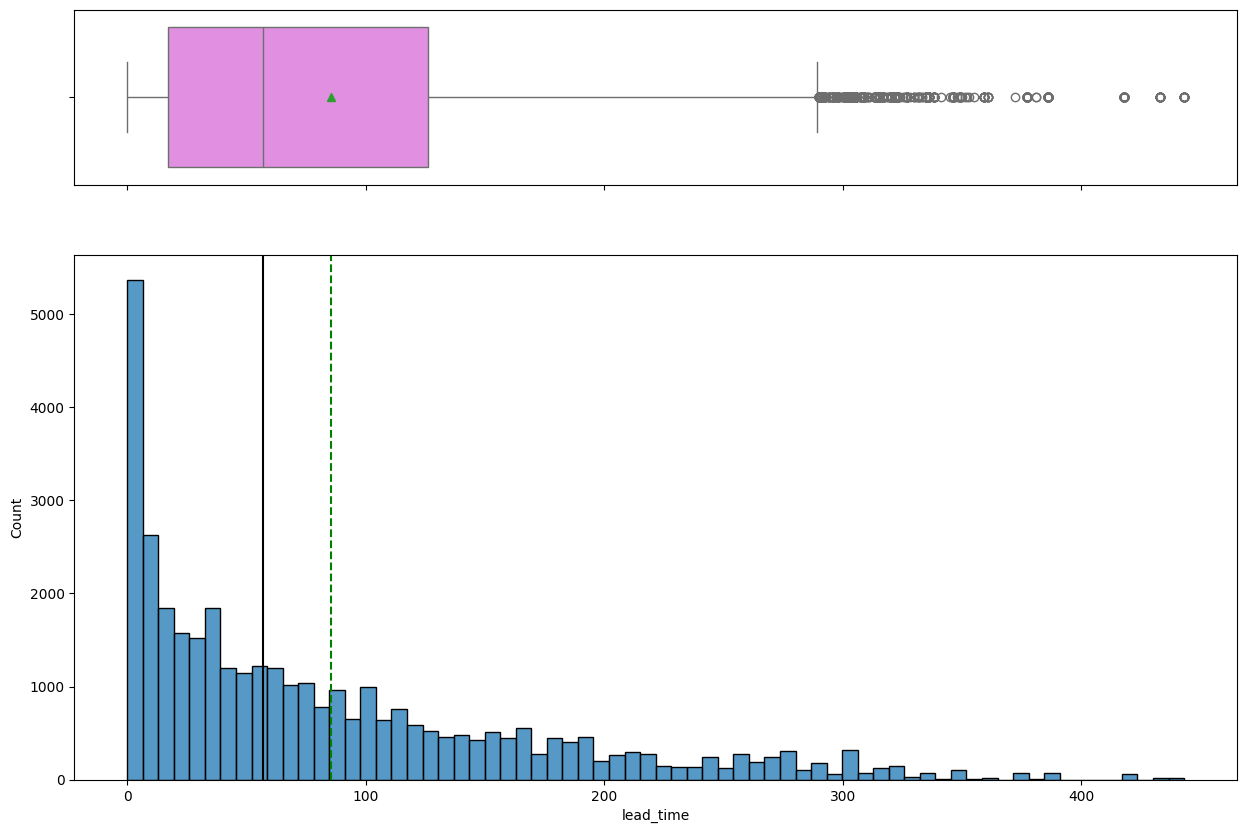

In [ ]:
histogram_boxplot(df, "lead_time")

Observation:


*   The histogram displays the booking distribution, showing that many customers book on the day of arrival, while some reserve more than 400 days in advance.
*   The distribution is heavily skewed to the right, along with a significant number of outliers.

### Observations on average price per room

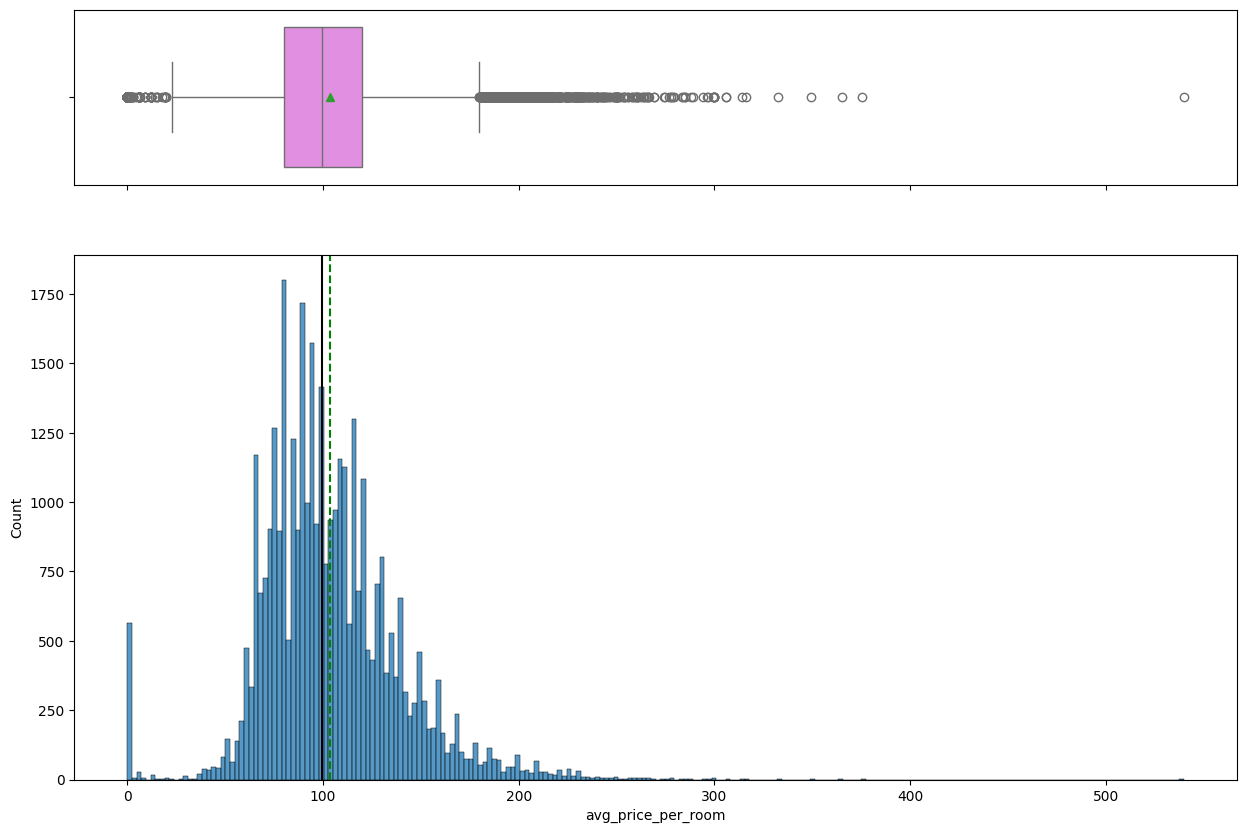

In [ ]:
histogram_boxplot(df, 'avg_price_per_room')

Observation:

*  The histogram illustrates the distribution of average room prices, with a mean of around 103 euros and a median of 99 euros, indicating they are significantly close to each other.
*   The distribution appears somewhat right skewed, with several outliers at both the beginning and end of the distribution.
* There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. Instead of dropping it, we will clip this to the upper whisker (Q3 + 1.5 * IQR).
* Interestingly some rooms have a price equal to 0. Let's check them.


In [ ]:
df[df["avg_price_per_room"] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

Observation:

There are several hotel rooms have a price of zero, and in the market segment column, many entries appear as complementary.

In [ ]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

Observation:
* Rooms booked online may be part of a promotional campaign conducted by the hotel.

*  Complementary bookings seem to be an added service provided by the hotel.

In [ ]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [ ]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

Observation:

Capping values above 500 at the Upper Whisker helps control high outliers, making data analysis more stable and interpretable.

### Observations on number of adults

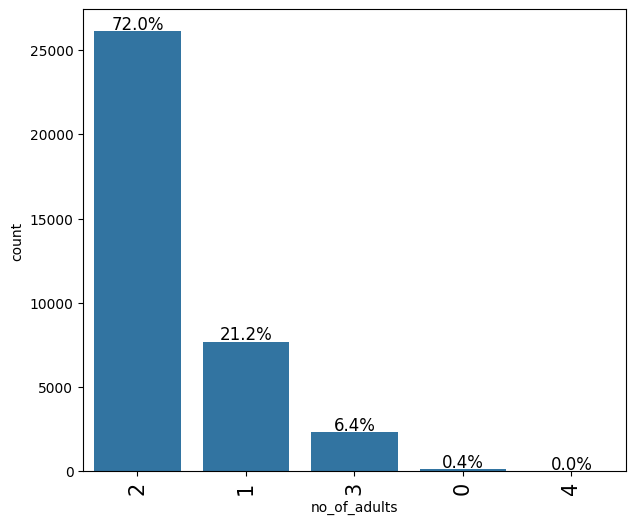

In [ ]:
labeled_barplot(df, "no_of_adults", perc=True)

Observation:

The majority of bookings, 72%, are made by two adults, followed by 21.2% made by a single adult.

### Observations on number of children

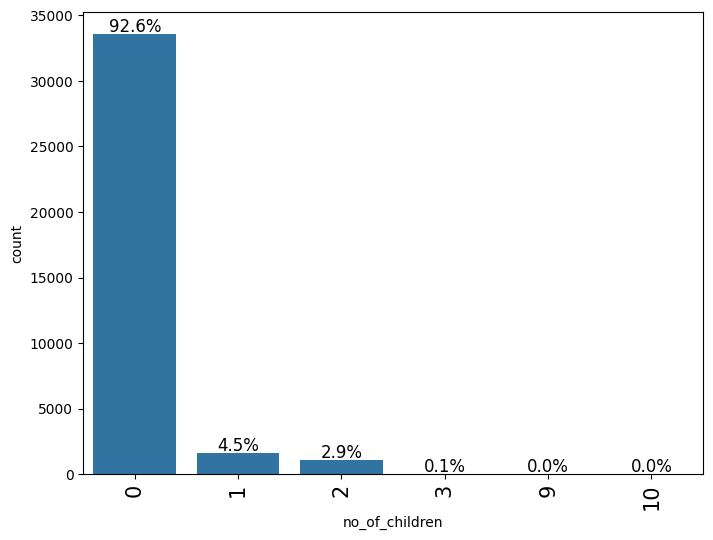

In [ ]:
labeled_barplot(df, "no_of_children", perc=True)

Observation:

*   The bar plot shows that bookings with one child account for 4.5%, while those with two children account for 2.9%.
*  It was also observed that approximately 93% of guests booked without children.
*  There are some values in the data where the number of children is 9 or 10, which is highly unlikely.
*  We will replace these values with the maximum value of 3 children.




In [ ]:
# replacing 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

### Observations on number of week nights

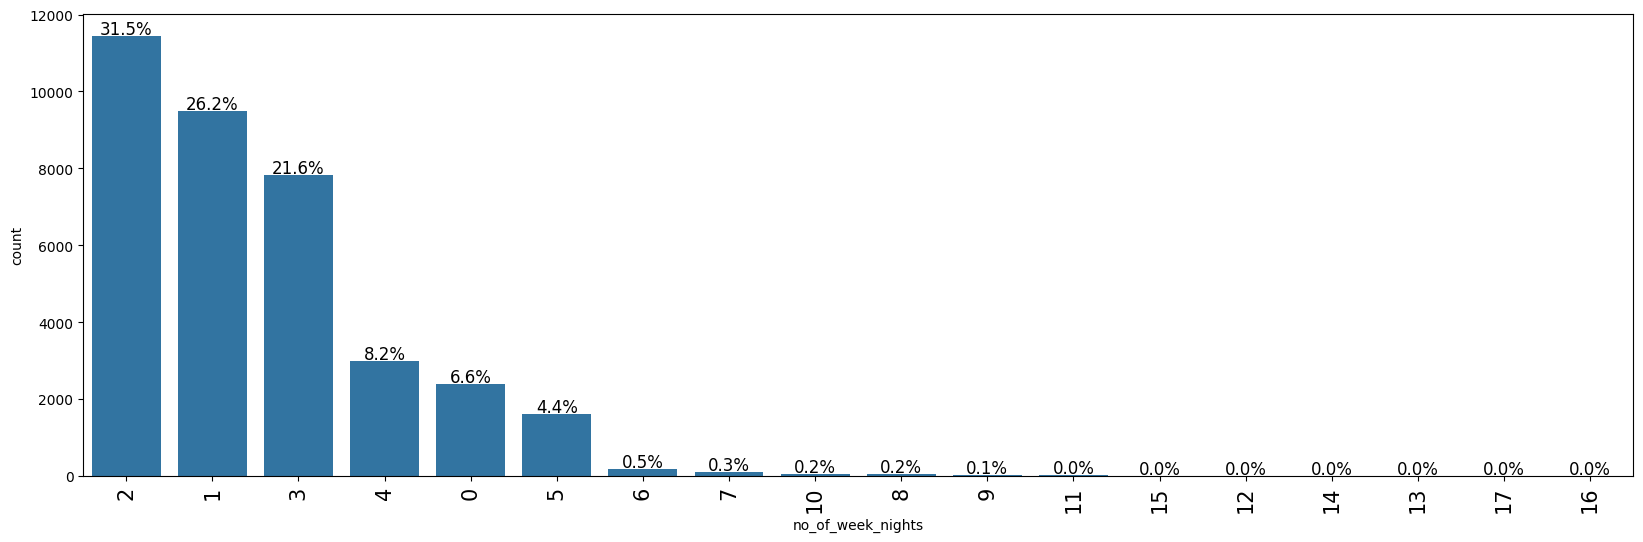

In [ ]:
labeled_barplot(df, "no_of_week_nights", perc=True)

Observation:


*  Weeknight bookings are predominantly for 2 nights at 31%, followed by 1 night at 26%, and 3 nights at 21%.
*   A very less proportion of customers made the booking for more than 10 days.



### Observations on number of weekend nights

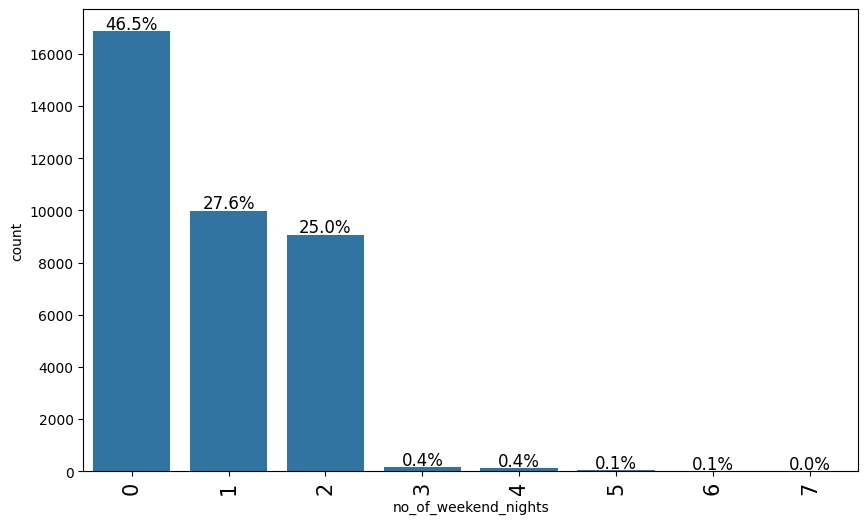

In [ ]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

Observation:


*   Weekend bookings are typically for one night at 27% or two nights at 25%, with a smaller proportion for stays of three to seven days.
*   The bar plot shows that 46% of bookings are made on weekdays.



### Observations on required car parking space

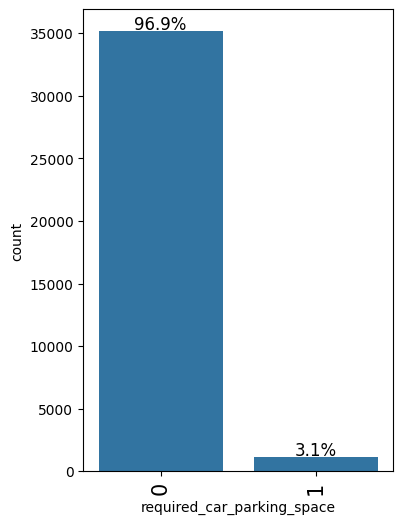

In [ ]:
labeled_barplot(df, "required_car_parking_space", perc=True)

Observation:

* 96.9% of the customers do not require a car parking space.
*   The data indicates that only 3.1% of bookings require a parking space.


### Observations on type of meal plan

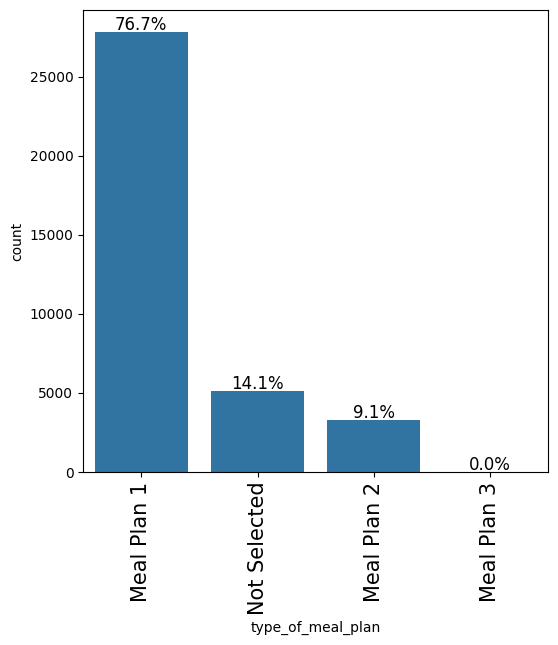

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

Observation:


*  The data shows that 14.1% of bookings do not require meals during the stay.
*  The most requested meal plan is Meal Plan 1 (breakfast) at 76%, followed by Meal Plan 2 (lunch or dinner) at 9%.



### Observations on room type reserved

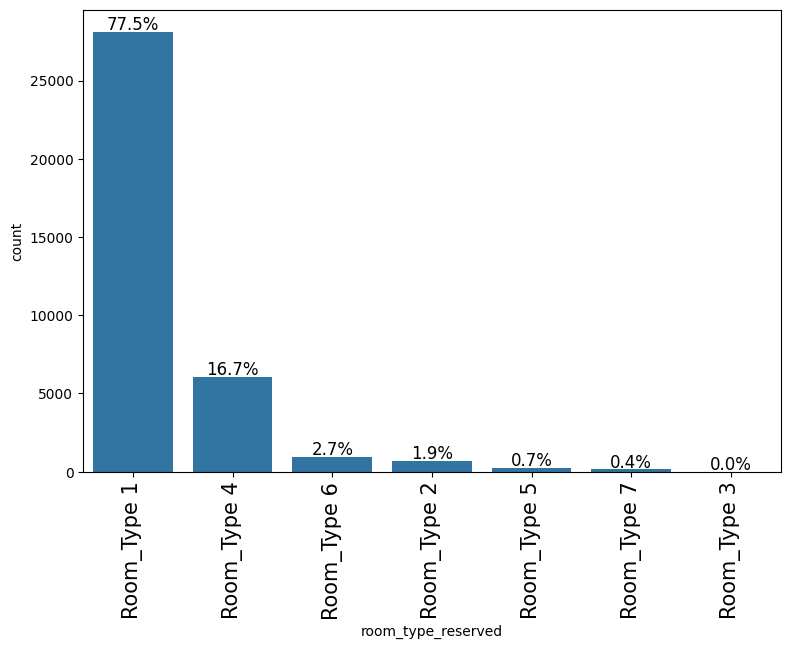

In [ ]:
labeled_barplot(df, "room_type_reserved", perc=True)

Observation:

The most frequently reserved room type is Type 1 at 77%, followed by Type 4 at 16%.

### Observations on arrival month

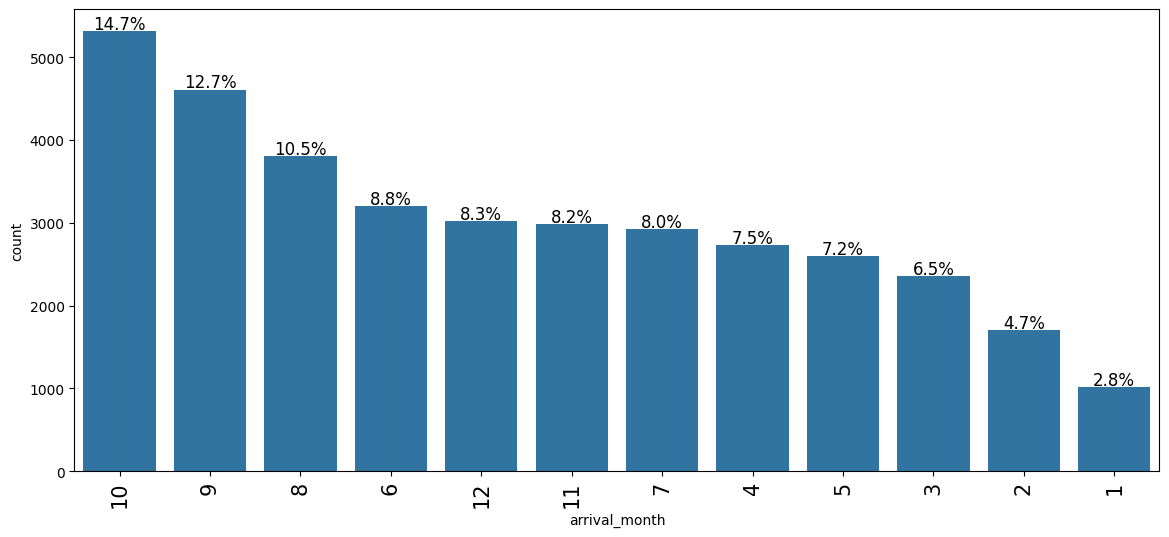

In [ ]:
labeled_barplot(df, "arrival_month", perc=True)

Observation:


*  The data indicates that the busiest months, with bookings ranging from 10% in August, 12% in September, and peaking at 14% in October.
*   The months with the least traffic tend to be January at 2%, February at 4%, and March at 6%. In contrast, the remaining months average around 8%.


### Observations on market segment type

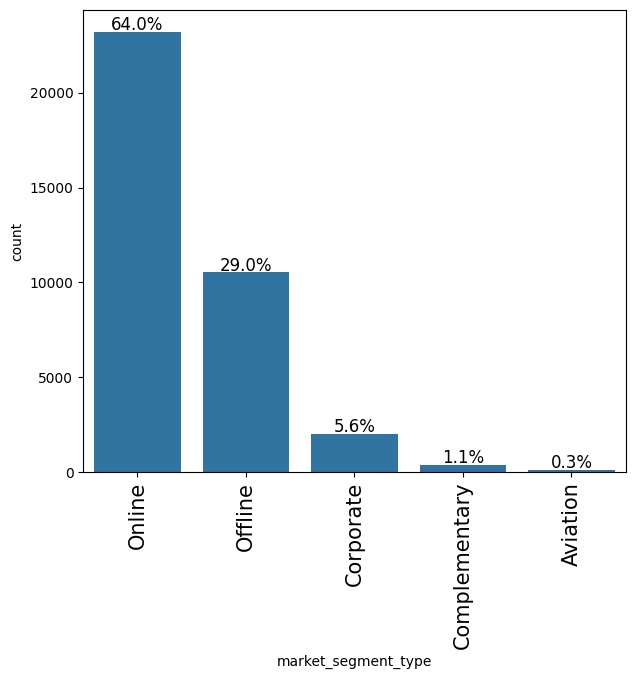

In [ ]:
labeled_barplot(df, "market_segment_type", perc=True)

Observation:


*   The majority of bookings are made online at 64%, followed by walk-in or offline guests at 29%.





### Observations on number of special requests

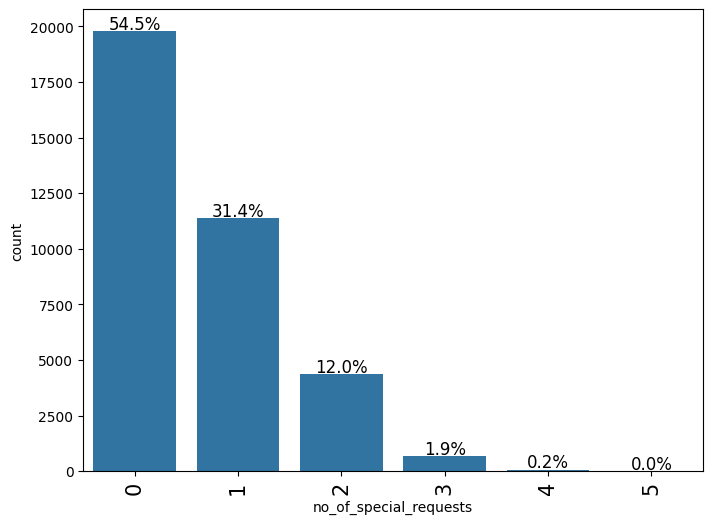

In [ ]:
labeled_barplot(df, "no_of_special_requests", perc=True)

Observation:


*   More than half of guests, at 54%, typically do not have preferences or special requests for their bookings.
*   It was also observed that guests who come alone have special requests at a rate of 31%.



### Observations on booking status



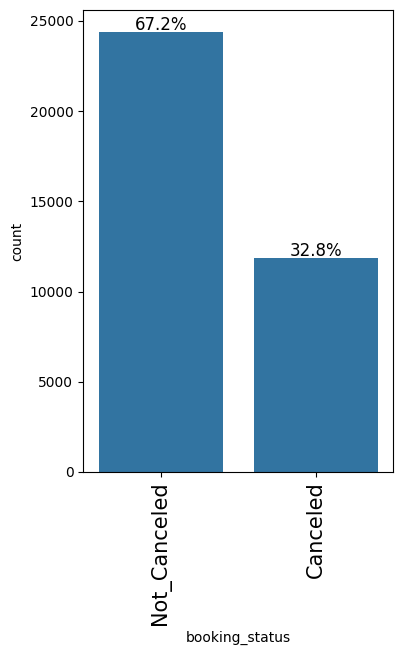

In [ ]:
labeled_barplot(df, "booking_status", perc=True)

Observation:

The dataset indicates that the cancellation rate for current bookings is 32.8%.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [ ]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

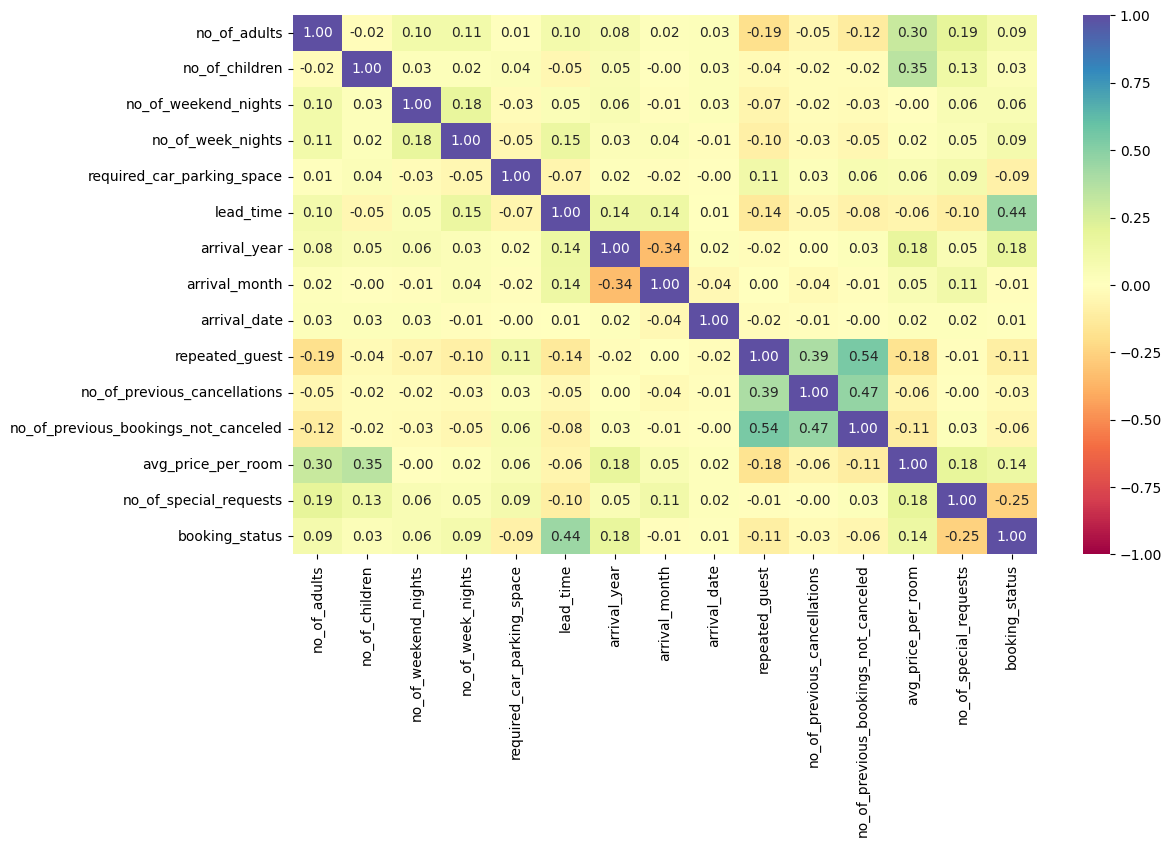

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:

*   The booking status shows a positive correlation with lead time but a negative correlation with special requests.
*   The average room price is positively correlated with both the number of children and adults. This makes sense as more the number of customers more rooms they will require thus increasing the cost.
*   A negative correlation exists between average room price and repeated guests, suggesting the hotel may be offering loyalty benefits to returning customers.
*   Non-canceled bookings positively correlate with both repeated guests and booking cancellations. This suggests that repeat guests may have a lower likelihood of canceling. Further analysis will be conducted.
*  Arrival month shows a negative correlation with booking status, indicating a higher likelihood of cancellations before the arrival month. Further analysis will be conducted



**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

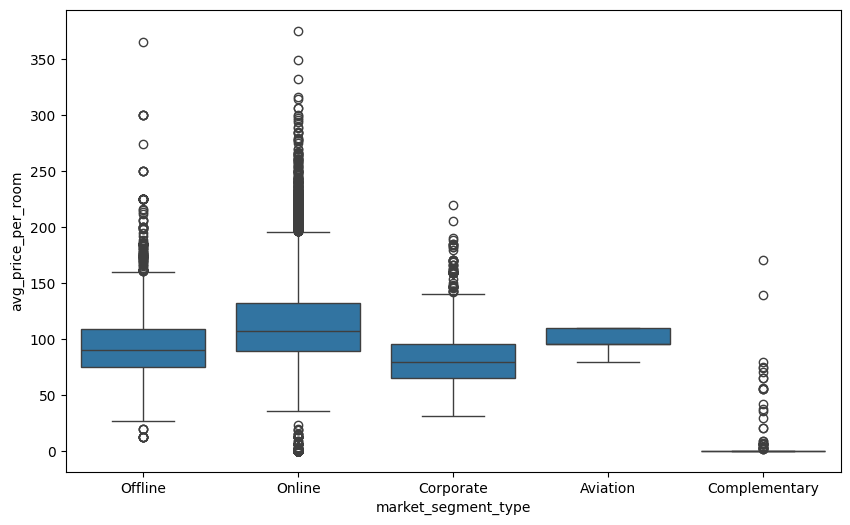

In [ ]:
plt.figure(figsize=(10, 6))
# Assuming 'df' is your DataFrame containing the data
sns.boxplot(
    data=df,  # Make sure 'df' is defined and accessible
    x="market_segment_type",
    y="avg_price_per_room",
)
plt.show()

Observation:


*  Online bookings have the highest average room prices, while complementary bookings have the lowest average room prices.
*   Average room prices for aviation, offline, and corporate bookings are generally within a similar range.




**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


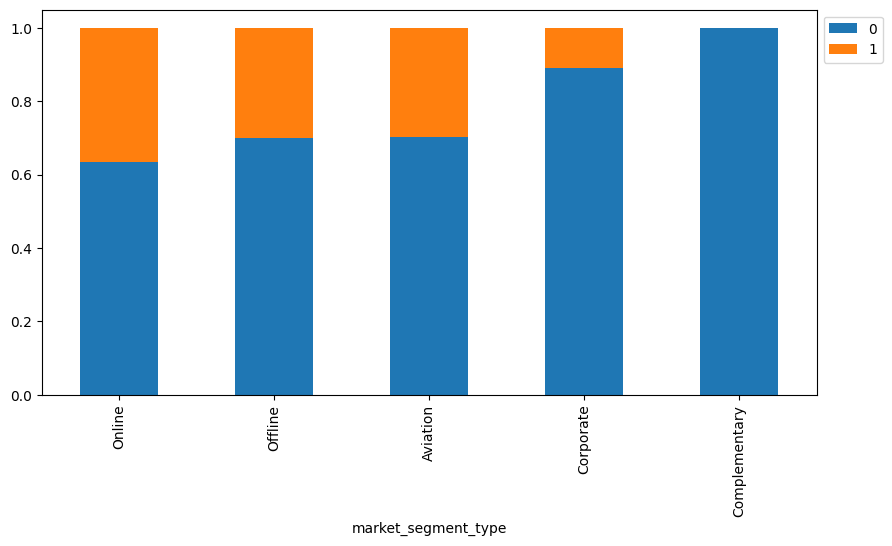

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

Observation:

*  The majority of bookings are made online, followed by offline bookings.
*  The high cancellation rate in online bookings suggests that customers in this segment may be more inclined to cancel, possibly due to flexible booking policies or competitive options.
* Corporate segment shows very low cancellations.








**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**


booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


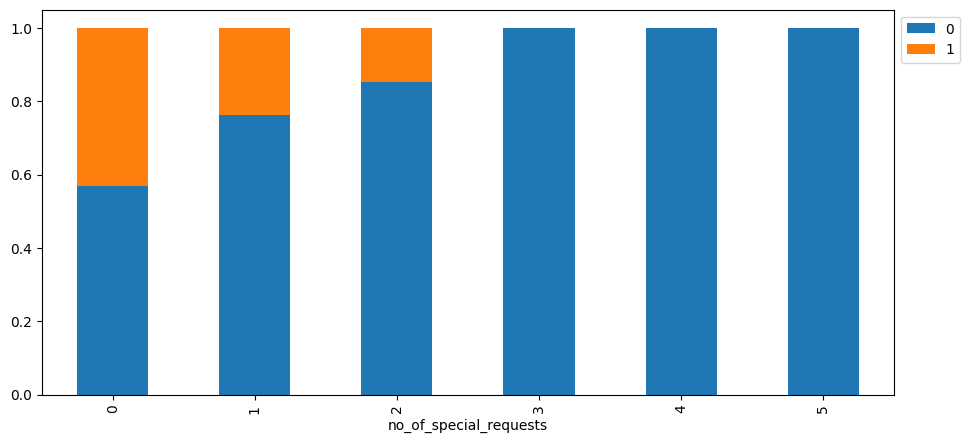

In [ ]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

Observation:


*   This indicates that a significant number of guests with no_of_special_requests still tend to cancel their bookings, but they also make up the majority of non-canceled bookings.
*   This shows that having one special request is associated with a higher number of non canceled bookings compared to cancellations.
*  The ratio of not canceled to canceled is quite favorable for guests with two and one special requests, suggesting that additional requests may correlate with a commitment to stay.





**Let's see if the special requests made by the customers impacts the prices of a room**

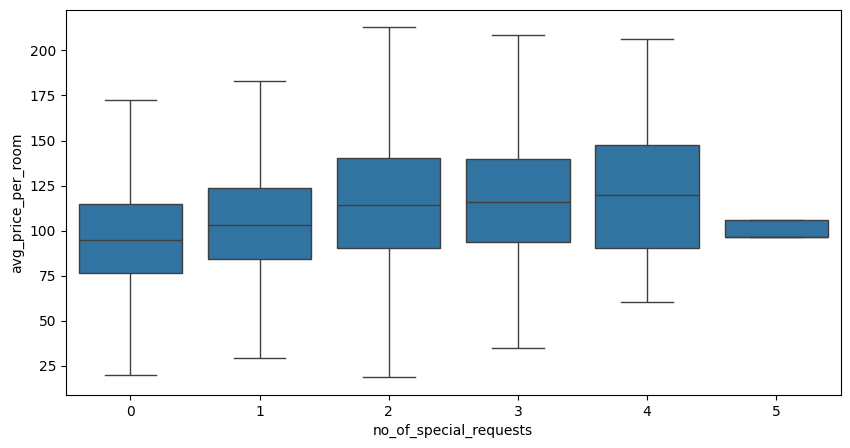

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="no_of_special_requests", y="avg_price_per_room", showfliers=False)
plt.show()

Observation:


*   The median average room price tends to increase with the number of special requests. For instance, bookings with 0 special requests generally have a lower median price compared to those with 1 or more requests.
*   The trend suggests that guests who make special requests are often paying more for their rooms.








**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

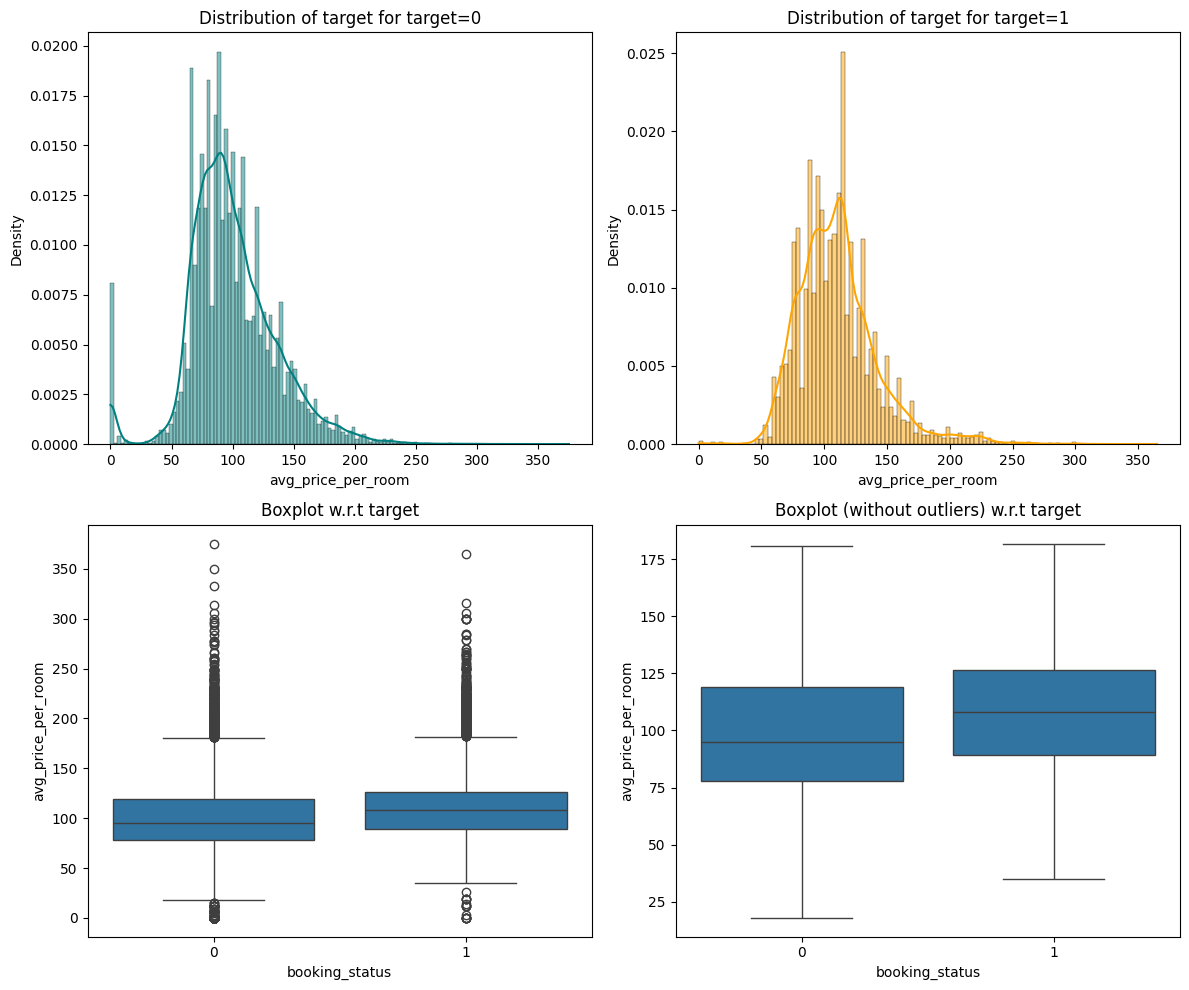

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

Observation:


*   The histogram shows that higher prices correlate strongly with the booking status; it may imply that customers willing to pay more are more likely to complete their bookings.

*   If cancelled bookings are concentrated at lower prices, it suggests that lower-priced options may lead to higher cancellation rates.



**There is a positive correlation between booking status and lead time also. Let's analyze it further**

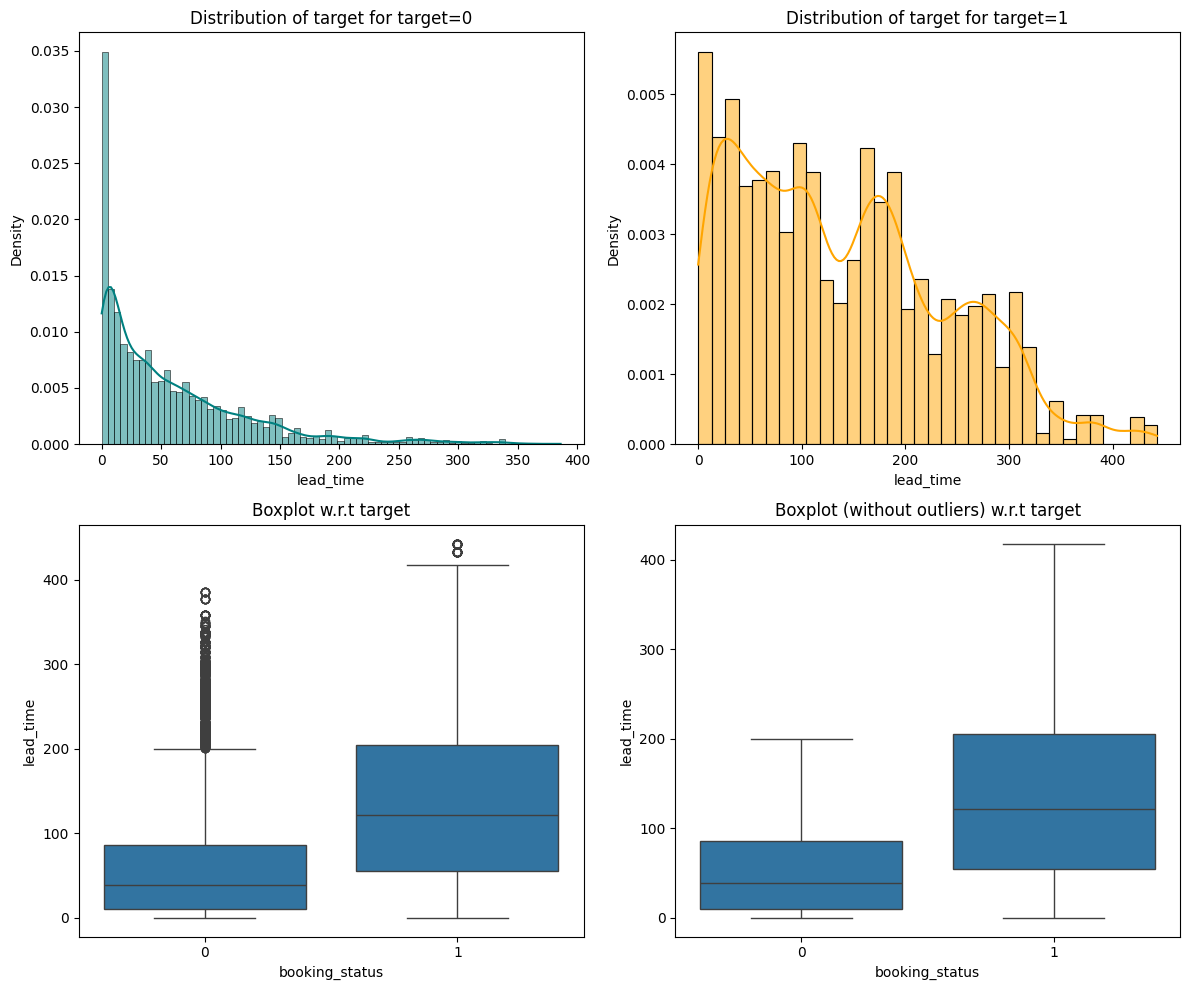

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

Observation:


*   Booking statuses show a higher frequency at longer lead times; this might indicate that customers are more likely to commit to their bookings when they plan well in advance.
*   Canceled bookings are concentrated around shorter lead times, which suggests that impulsive bookings made with little lead time might be more prone to cancellation.




**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [ ]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [ ]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


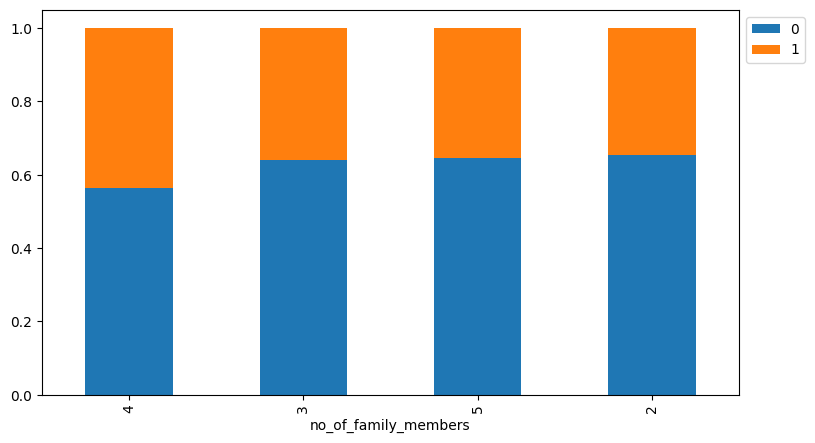

In [ ]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

Observation:


*   Families with more members might be less likely to cancel bookings, as larger groups often have shared interests and plans.
*   Cancellations increase with family size; it could indicate logistical challenges or the complexities of coordinating larger groups.




**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [ ]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [ ]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

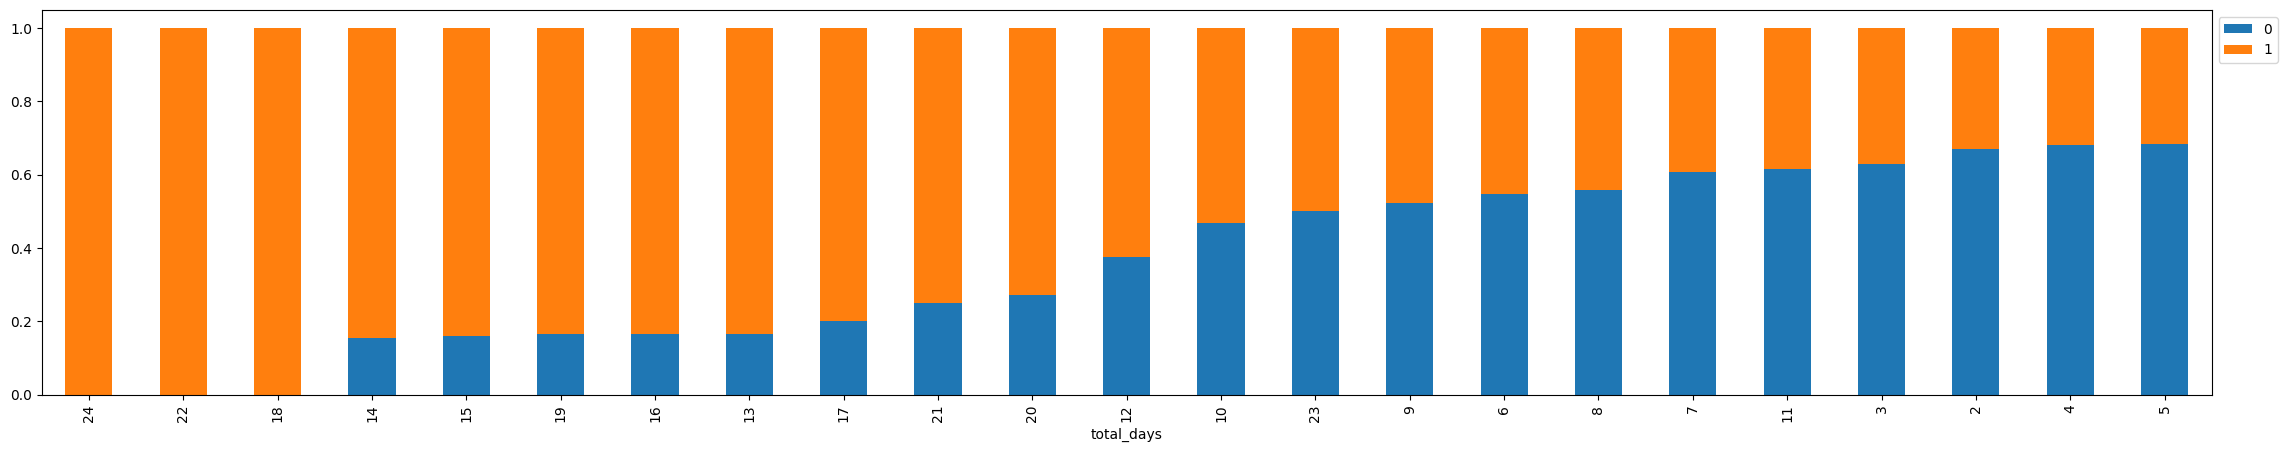

In [ ]:
stacked_barplot(stay_data, "total_days", "booking_status")

Observation:


*   Customers who stay longer may have a higher tendency to confirm their bookings, possibly due to a more committed travel plan.
*   As cancellations increase with longer stays, it might suggest potential issues such as dissatisfaction or unexpected circumstances leading to changes in travel plans.



**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


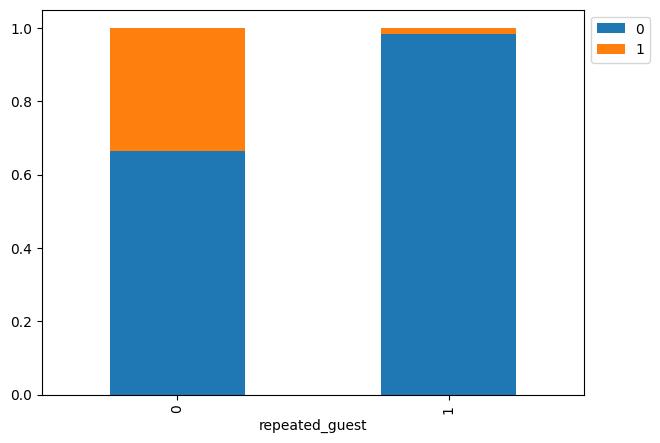

In [ ]:
stacked_barplot(df, "repeated_guest", "booking_status")

Observation:


*   A high confirmation rate among repeated guests is a positive sign of customer loyalty.
*   Cancelled bookings raise questions about potential issues such as service quality or external factors affecting their travel plans.



**Let's find out what are the busiest months in the hotel.**

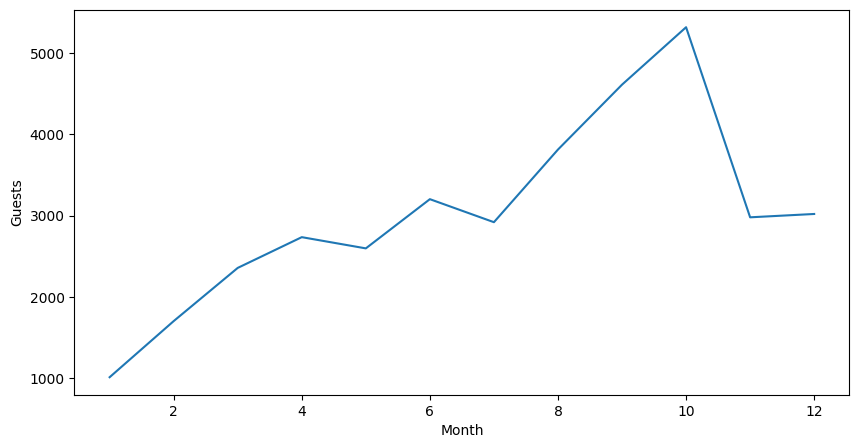

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

Observation:


*  The data reveals that hotel bookings follow a highly seasonal pattern, with distinct peaks occurring during 8 to 10 months of the year, when guest capacity ranges between 3,500 and 5,000.
*  The trends also show consistency, with 4 to 7 months reflecting a relatively steady flow of bookings, maintaining a guest capacity between 2,500 and 3,500.



**Let's check the percentage of bookings canceled in each month.**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


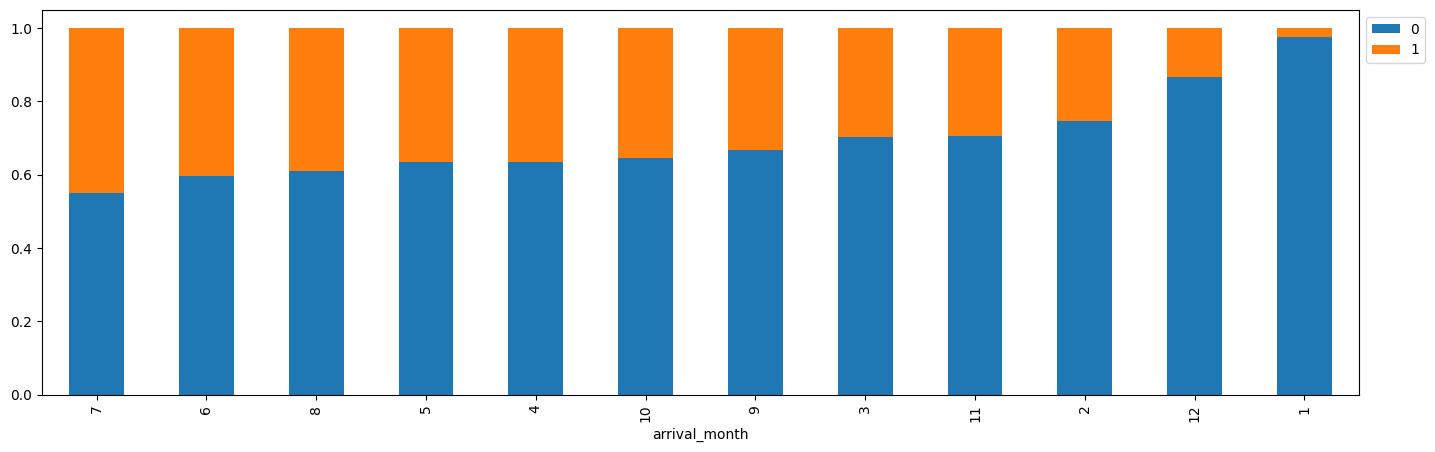

In [ ]:
stacked_barplot(df, "arrival_month", "booking_status")

Observation:


*  The dataset shows that the highest number of bookings (both confirmed and cancelled) occurred in October, with a total of 5,317 (3,437 confirmed and 1,880 cancelled).
*  January had the lowest number of total bookings at 1,014, with only 24 cancelled bookings and 990 confirmation.
*  This suggests that October may be a peak period for guest interest, while January might be a low season with a lower proportion of cancellations.






**As hotel room prices are dynamic, Let's see how the prices vary across different months**

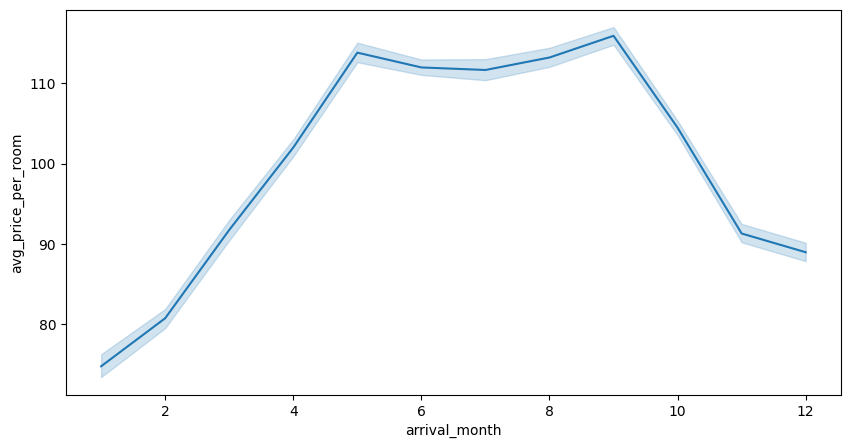

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="arrival_month", y="avg_price_per_room")
plt.show()

Observation:

*   The line plot reveals patterns in average room prices, showing higher prices from the 5th to the 10th month, likely indicating peak travel seasons
*  A decline in prices at the beginning and end of the year, suggesting off-peak periods when demand is lower.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's check for outliers in the data.

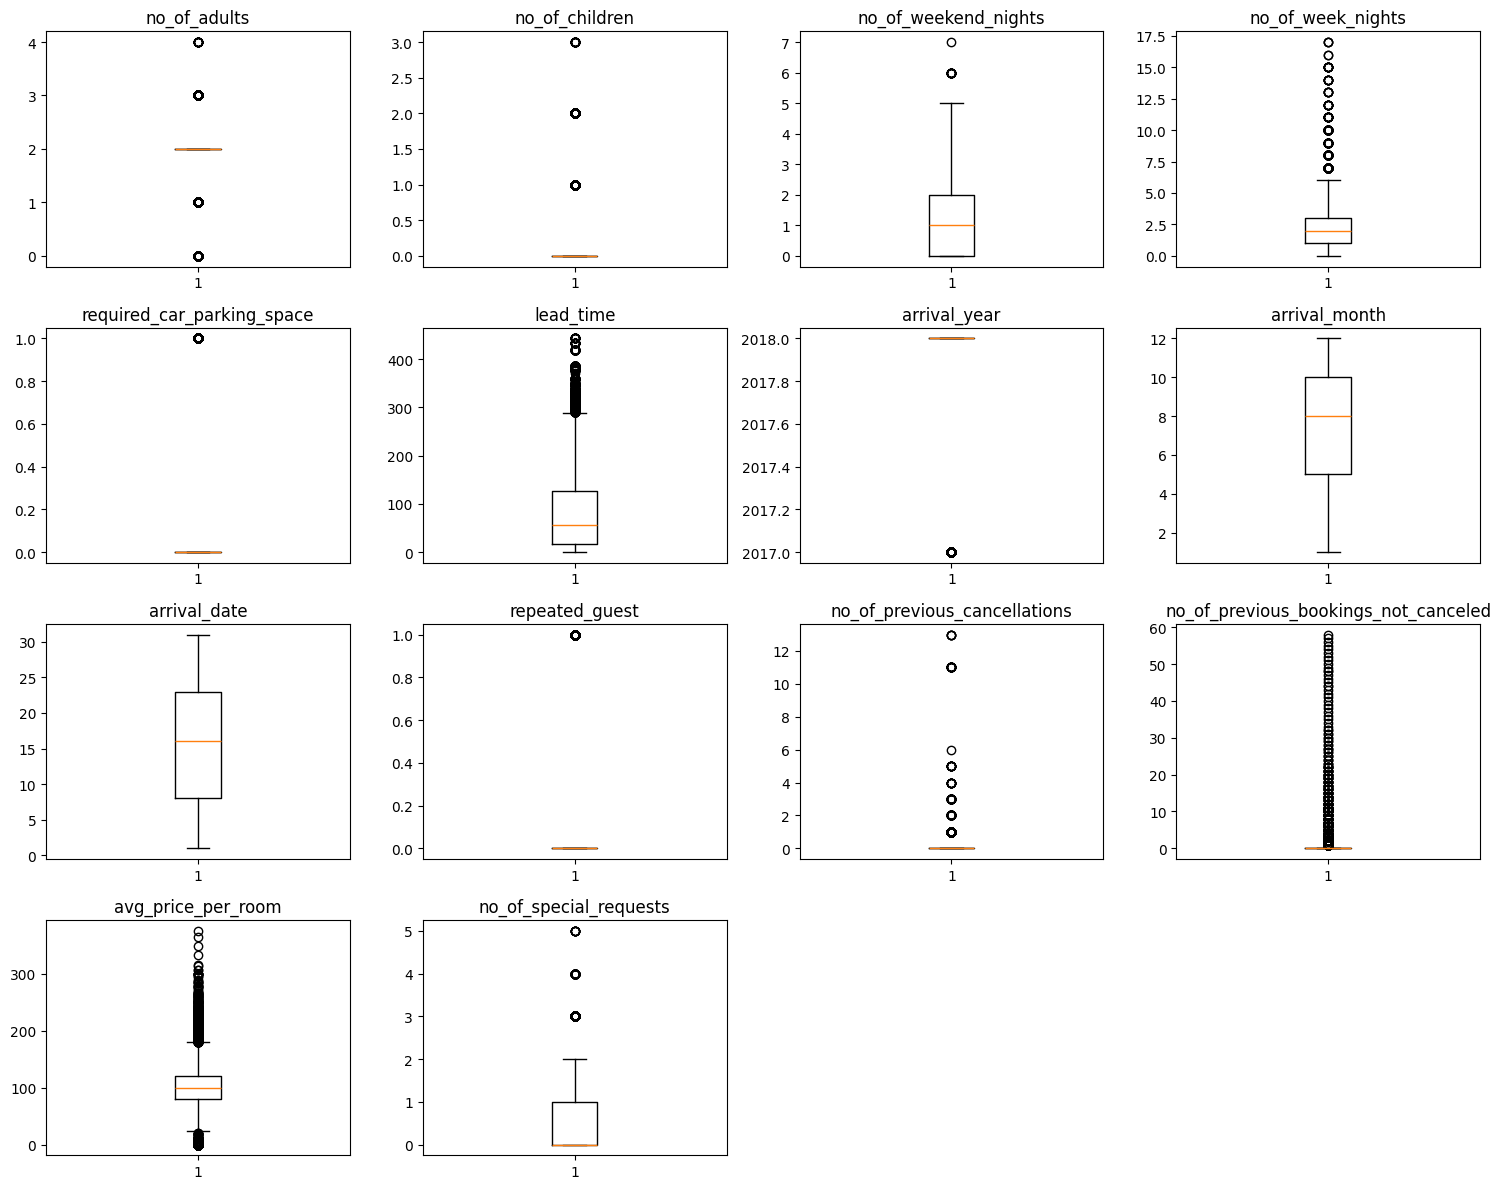

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observation:

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Bivariate Analysis

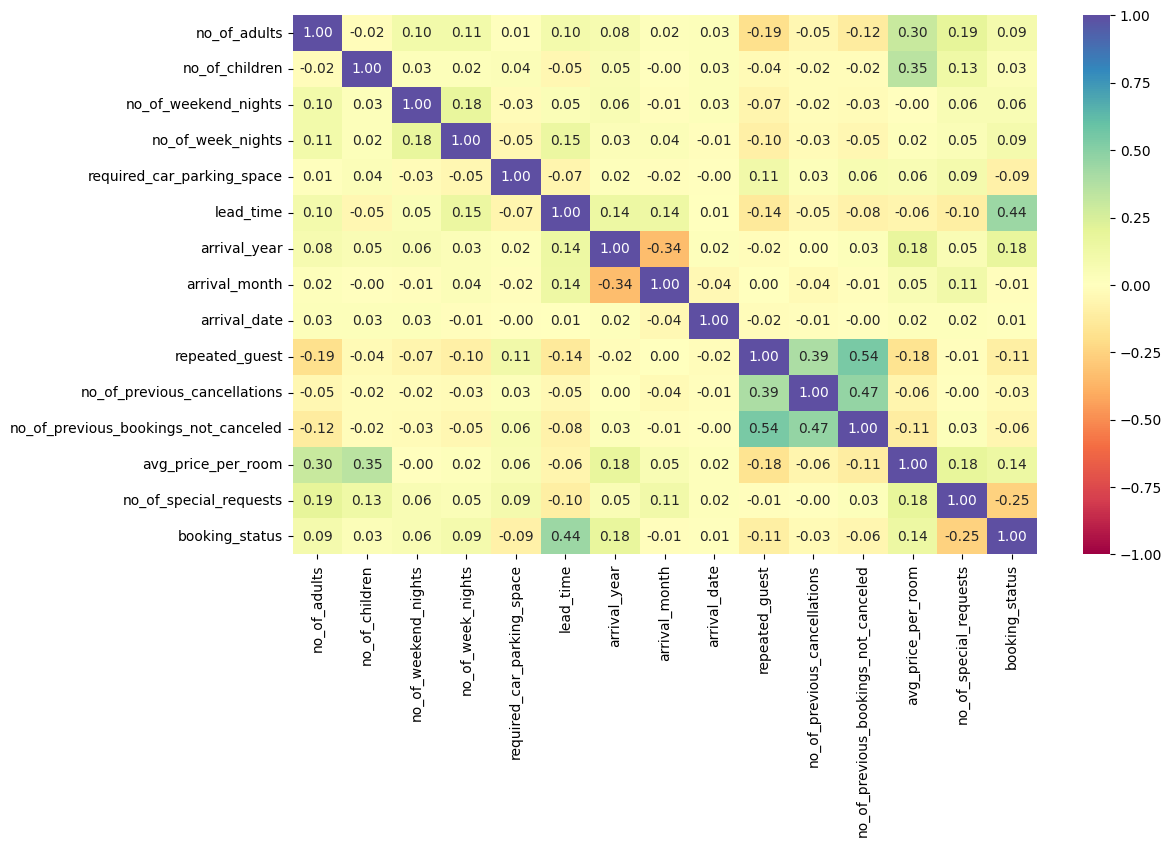

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:

After data processing, all relationships and correlations remain consistent.

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

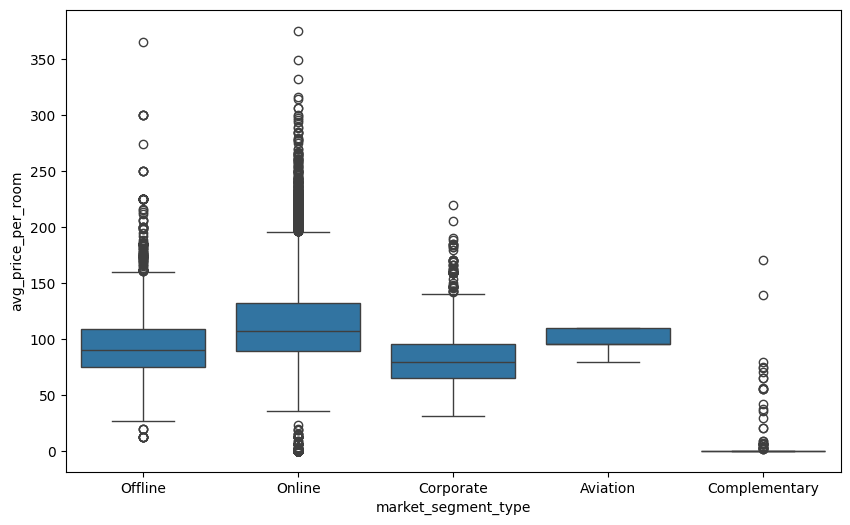

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

Observation:

After data processing, online bookings still show high price variation, offline and corporate prices remain similar, and complimentary rooms are consistently priced very low.

**Let's see if the special requests made by the customers impacts the prices of a room**

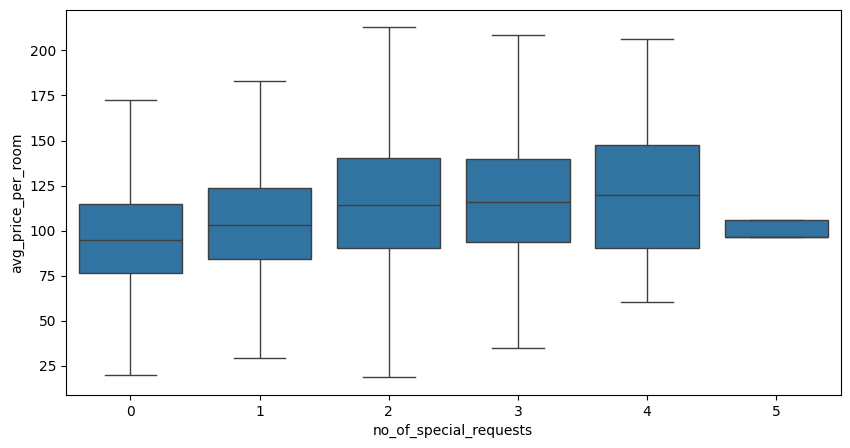

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="no_of_special_requests",
    y="avg_price_per_room",
    showfliers=False,  # turning off the outliers
)
plt.show()

Observation:

After data processing, rooms with special requests have slightly higher median prices than those without requests are still consistent.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

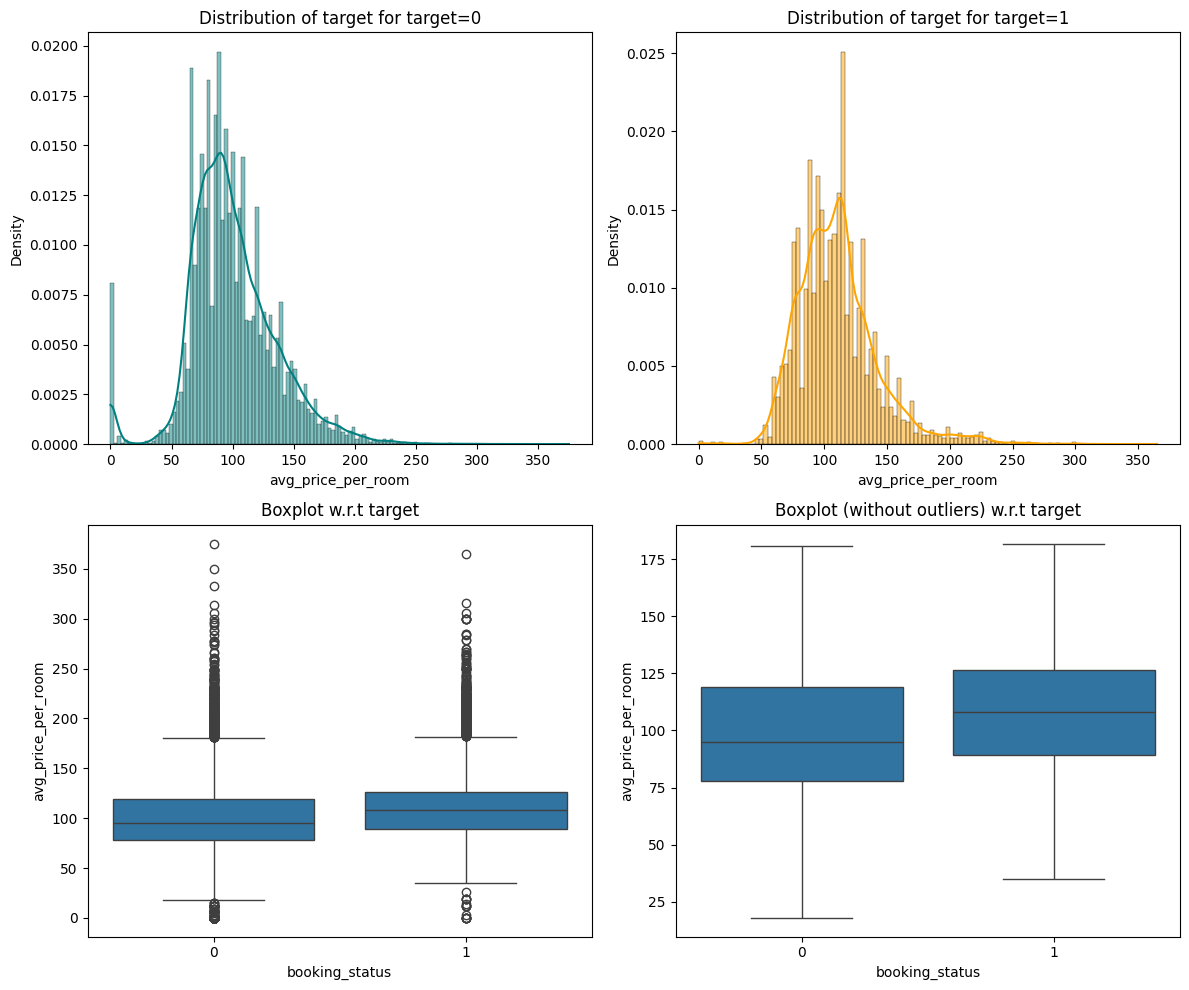

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

Observation:

After data processing, the price distribution for canceled and non-canceled bookings remains similar, with canceled bookings slightly higher in price than those not canceled.

## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

### Logistic Regression (with statsmodels library)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

X_train,X_test = X_train.astype('float'),X_test.astype('float')

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


Observation:

We had seen that around 67.06% of observations belongs to class 0 (Not canceled) and 3.29% observations belongs to class 1 (canceled), and this is preserved in the train and test sets.

#### Building Logistic Regression Model

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.3292
Time:                        08:24:21   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

### Coefficient interpretations

Observation:

**p-value**

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.


**Negative Impact**


*   no_of_adults: A positive coefficient (0.1137) indicates that as the number of adults increases, the likelihood of canceling booking increases.

* No_of_children: Similar to adults, a positive coefficient (0.1580) suggests that more children increase the likelihood of canceling bookings.

*  no_of_weekend_nights: A positive coefficient (0.1067) shows that more weekend nights booked increase the chances of an increase in canceling bookings.

* no_of_week_nights: Also positive coefficient (0.0397), indicating that booking more weeknights increases the likelihood of canceling the booking.

* lead_time: A positive coefficient (0.0157) suggests that longer lead times (time between booking and arrival) increase the likelihood of canceling the booking.

* Arrival_year: A positive relationship (0.4561) indicates that bookings in later years are more likely to book.

* AVG_price_per_room: A positive coefficient (0.0188) suggests that higher average room prices increase the likelihood of canceling a booking.

* Meal Plan 3 has an extremely high coefficient (17.3584) but with a very large standard error and possibility of canceling ordering services or bookings.

* Meal Plan 2 shows a positive association (0.1756) with booking likelihood canceling or ordering of services.


**Positive Impact**


* required_car_parking_space: A significant negative coefficient (-1.5943) implies that requiring car parking space increases the likelihood of not canceling booking.

* arrival_month: A negative coefficient (-0.0417) suggests that as the month increases (i.e., later in the year), the likelihood of not canceling booking increases.

*   no_of_special_requests: A large negative coefficient (-1.4689) indicates that more special requests are associated with a lower likelihood of cancling booking.

* Corporate and offline segments have negative coefficients (-1.1924 and -2.1946, respectively), indicating that these market segments are associated with a lower likelihood of not canceling booking.

* Offline shows some negative coefficient (-2.1946), indicating that market segments are associated with a lower likelihood of not cancling booking.

* Complementary segments have negative coefficients (-40.5975), indicating that these market segments are associated with a lower likelihood of not cancling booking.


In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg,X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80600 0.63410    0.73971 0.68285

Observation:

* The model accurately predicts 80.6% of the training dataset observations.

* The recall score of 63.4% shows that the model accurately identifies about 63.4% (true positives).

* The precision of 73.97% indicates that the model is correct about 73.97% of the time when predicting (false positives).

* The F1 score of approximately 68.3% balances precision and recall, making it useful for evaluating models with class imbalances.



## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
vif_results = checking_vif(X_train)
print(vif_results)

                                 feature            VIF
0                                  const 39497686.20788
1                           no_of_adults        1.35113
2                         no_of_children        2.09358
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09571
5             required_car_parking_space        1.03997
6                              lead_time        1.39517
7                           arrival_year        1.43190
8                          arrival_month        1.27633
9                           arrival_date        1.00679
10                        repeated_guest        1.78358
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06860
14                no_of_special_requests        1.24798
15         type_of_meal_plan_Meal Plan 2        1.27328
16         type_of_meal_plan_Meal Plan 3        

Observations

- None of the numerical variables show moderate or high multicollinearity.
- We will ignore the VIF for the dummy variables.

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit()
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.425731
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.3282
Time:                        08:24:51   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600    

### Coefficient interpretations

Observation:

**After dropping the column with highest p-value**:

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.

* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.






In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

Observation:

* All the variables left have p-value<0.05.
* So we can say that lg1 is the best model for making any inference.
* The performance on the training data is the same as before dropping the variables with the high p-value.




####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11491         1.16546               1.11470   
Change_odd% -100.00000      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57195        0.95839         0.06478   
Change_odd%      57.19508       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

### Coefficient interpretations

Observation:

* no_of_adults: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.11 times or a 11.49% increase in the odds of a booking getting cancelled.

* no_of_children: Holding all other features constant a 1 unit change in the number of children will increase the odds of a booking getting cancelled by 1.16 times or a 16.54% increase in the odds of a booking getting cancelled.

* no_of_weekend_nights: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.11 times or a 11.46% increase in the odds of a booking getting cancelled.

* no_of_week_nights: Holding all other features constant a 1 unit change in the number of weeknights a customer stays at the hotel will increase the odds of a booking getting cancelled by 1.04 times or a 4.25% increase in the odds of a booking getting cancelled.

* required_car_parking_space: The odds of a customer who requires a car parking space are 0.2 times less than a customer who doesn't require a car parking space or a 79.70% fewer odds of a customer canceling their booking.

* lead_time: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.58% increase in the odds of a booking getting cancelled.

* no_of_special_requests: Holding all other features constant a 1 unit change in the number of special requests made by the customer will decrease the odds of a booking getting cancelled by 0.22 times or a 77% decrease in the odds of a booking getting cancelled.

* avg_price_per_room: Holding all other features constant a 1 unit change in the lead time will increase the odds of a booking getting cancelled by 1.01 times or a 1.93% increase in the odds of a booking getting cancelled.

* type_of_meal_plan_Not Selected: The odds of a customer who has not selected any meal plan cancelling the booking are 1.33 times more than a customer who has selected a meal plan or a 33.10% higher odds of a booking getting cancelled if a meal plan is not selected. [keeping all the other meal plan types as reference]

#### Checking model performance on the training set

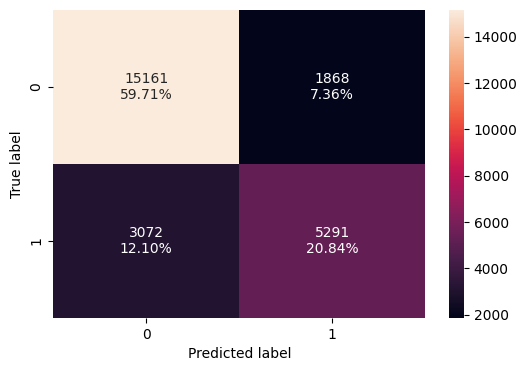

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

Observation:


*   The training performance model is the same data as the training performance model for confusion matrix.




#### ROC-AUC
* ROC-AUC on training set

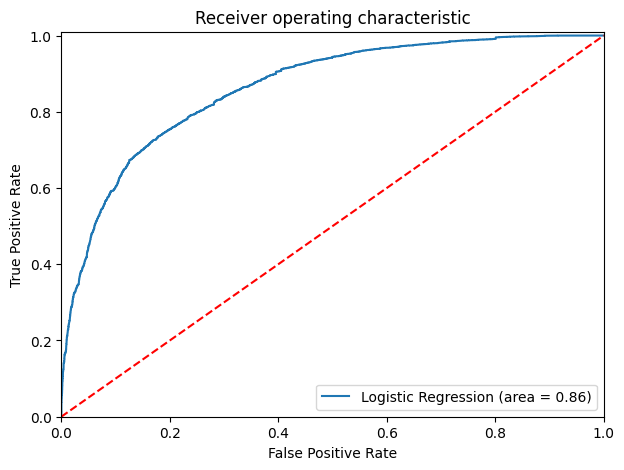

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observation:
* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.86 on training is quite good.

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


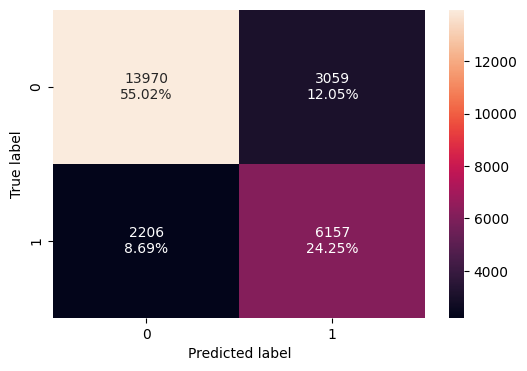

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

Observation:
*  Recall has increased significantly by exactly 10%; hence, it is not overfitting as compared to the previous model.

*  The model is still giving a good performance.

* As we will decrease the threshold value, Recall will keep on increasing and the Precision will decrease, but this is not right, we need to choose an optimal balance between recall and precision.







#### Let's check the performance on the test set

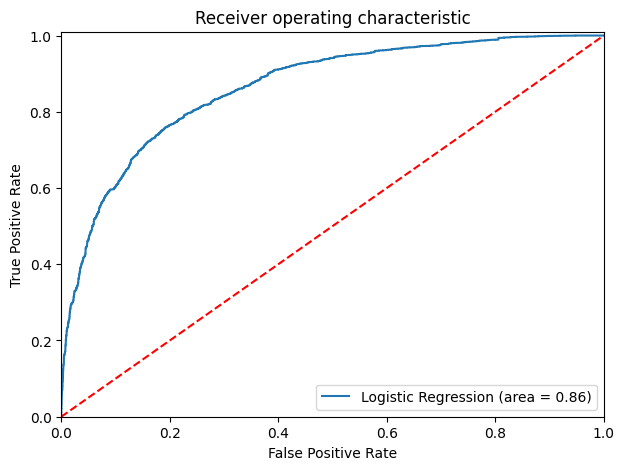

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observation:
* Logistic Regression model is giving a generalized performance on test set.
* ROC-AUC score of 0.86 on test is quite good.

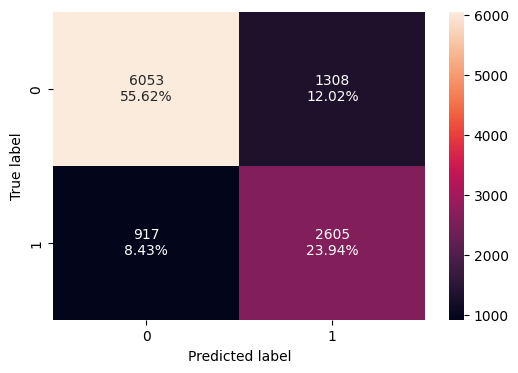

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

Observation:

*   The recall on the test set is slightly higher than the training recall, indicating that the model maintains strong performance in correctly identifying positive cases, without substantial overfitting.

*   The F1 score, which balances precision and recall, is nearly identical across both sets, indicating stable performance.




#### Let's use Precision-Recall curve and see if we can find a better threshold

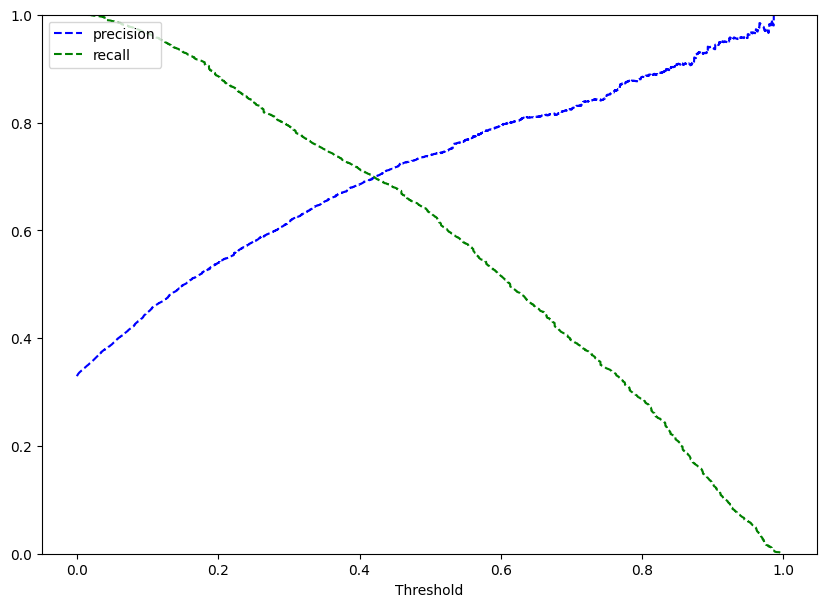

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Observation:

At 0.42 threshold we get a balanced precision and recall.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

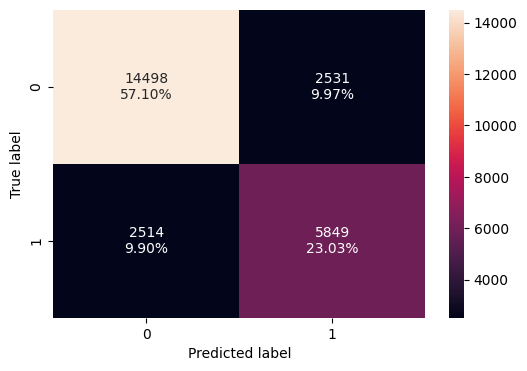

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80132 0.69939    0.69797 0.69868

Observation:
* Model performance has improved as compared to our initial model.
* Model has given a balanced performance in terms of precision and recall.

#### Let's check the performance on the test set

**Using model with default threshold**

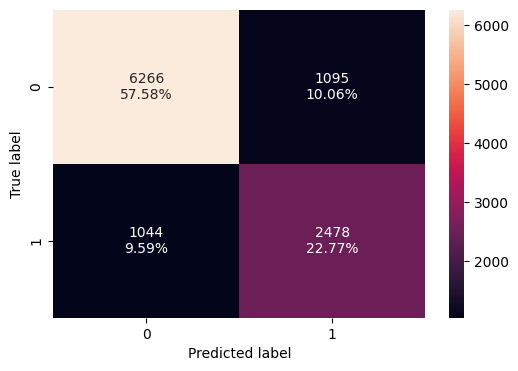

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

**Observation**:

*   The higher test precision (0.72900) compared to training precision (0.69797) indicates more reliable positive predictions on new data, with a decrease in recall.

*   The model shows a slight decrease in recall and F1 score on the test data, indicating potential limitations in identifying all true non-canceled bookings.



* ROC curve on test set

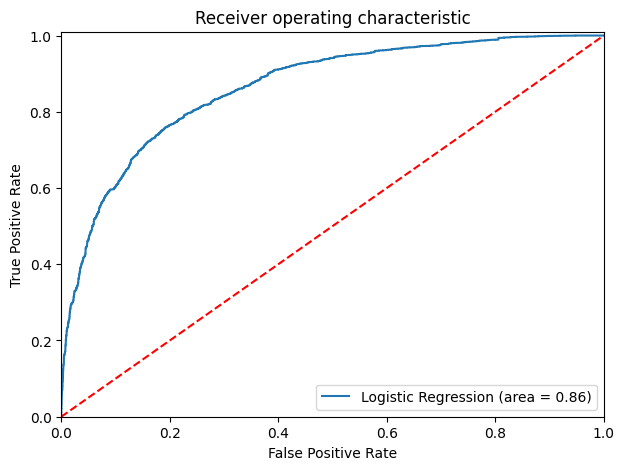

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37**

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.37

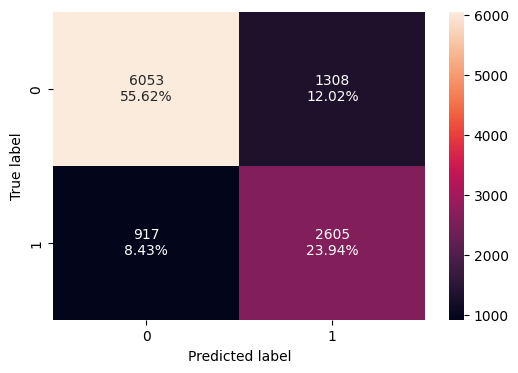

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

**Using model with threshold = 0.42**

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

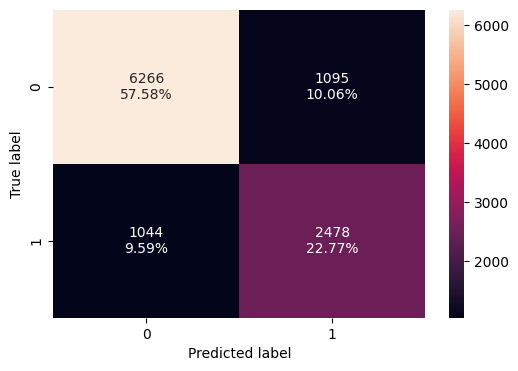

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80345 0.70358    0.69353 0.69852

## Final performance Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80545   
Recall                                   0.63267   
Precision                                0.73907   
F1                                       0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69939  
Precision                             0.69797  
F1                                    0.69868

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80465   
Recall                                   0.63089   
Precision                                0.72900   
F1                                       0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80345  
Recall                                0.70358  
Precision                             0.69353  
F1                                    0.69852

### Observations from Logistic Regression model

- We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.69 on the training set and formulate marketing policies accordingly.

* The logistic regression models are giving a generalized performance on training and test set.

* **Using the model with default threshold the model will give a low recall but good precision score -** The hotel will be able to predict which bookings will not be cancelled and will be able to provide satisfactory services to those customers which help in maintaining the brand equity but will lose on resources.
* **Using the model with a 0.37 threshold the model will give a high recall but low precision score -** The hotel will be able to save resources by correctly predicting the bookings which are likely to be cancelled but might damage the brand equity.
* **Using the model with a 0.42 threshold the model will give a balance recall and precision score -** The hotel will be able to maintain a balance between resources and brand equity.

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

## Building a Decision Tree model

#### Data Preparation for modeling (Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


Observation:
We had seen that around 67.06% of observations belongs to class 0 (Not canceled) and 3.29% observations belongs to class 1 (canceled), and this is preserved in the train and test sets.

#### Building Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking model performance on training set

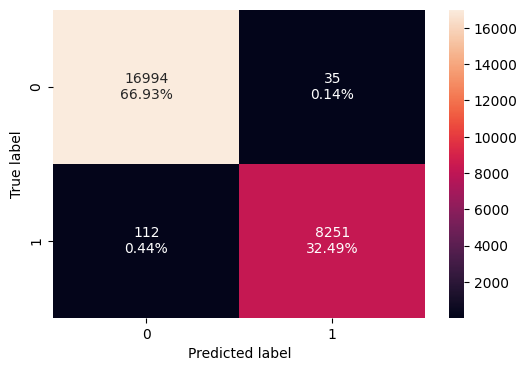

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

Observation:
* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

#### Checking model performance on test set

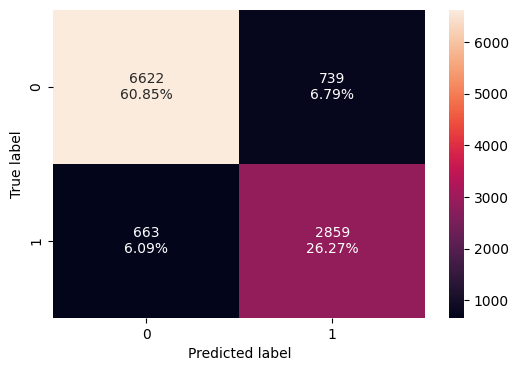

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

Observation:

* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

**Before pruning the tree let's check the important features.**

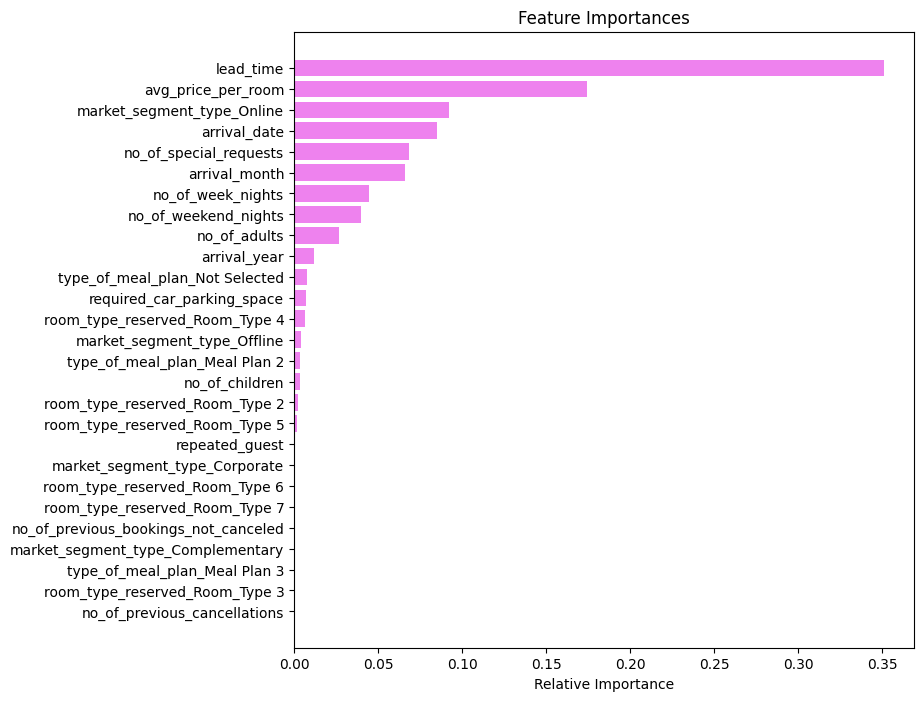

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:

* Lead time is the most important feature followed by average price per room.
* Now let's prune the tree to see if we can reduce the complexity.

## Do we need to prune the tree?

#### Pruning the tree

**Pre-Pruning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

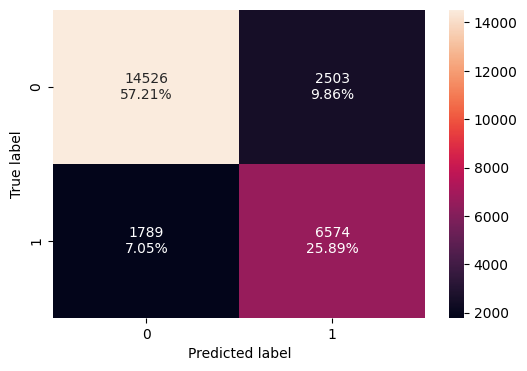

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

#### Checking performance on test set

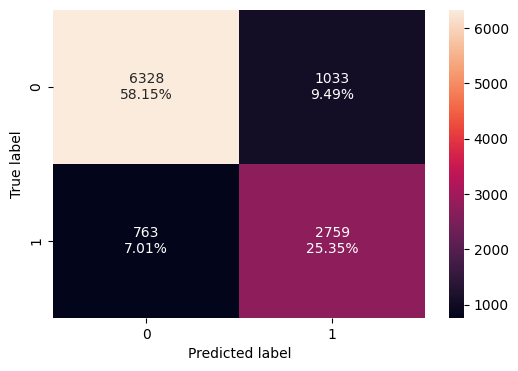

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

Observation:

*  The two models have minimal performance differences, with the test model slightly better in accuracy, precision, and F1 score, while the training model excels in recall, making the test model the more balanced choice.




#### Visualizing the Decision Tree

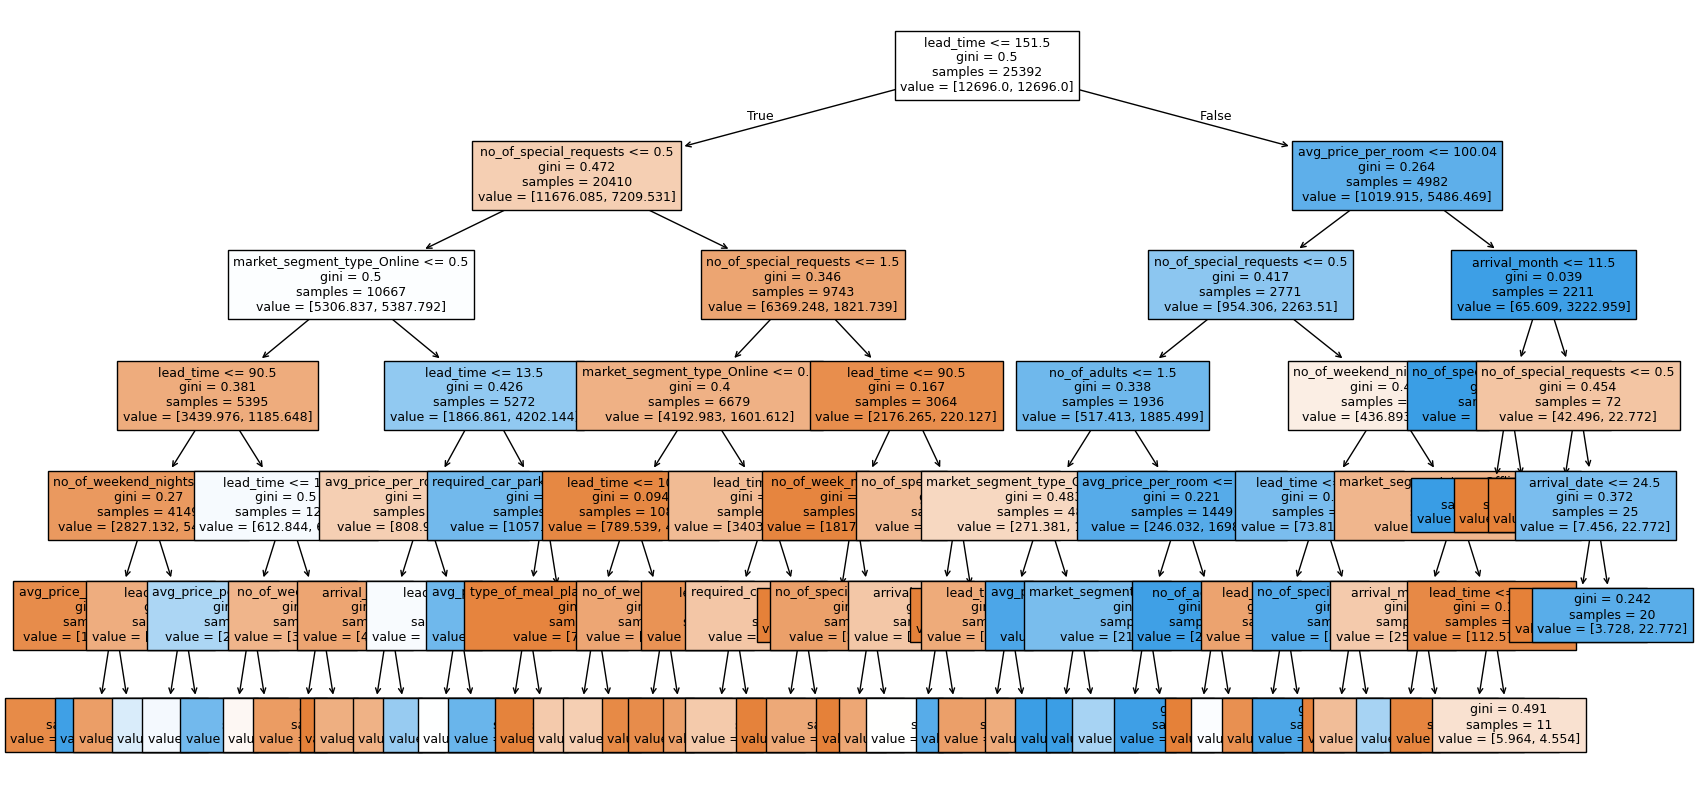

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

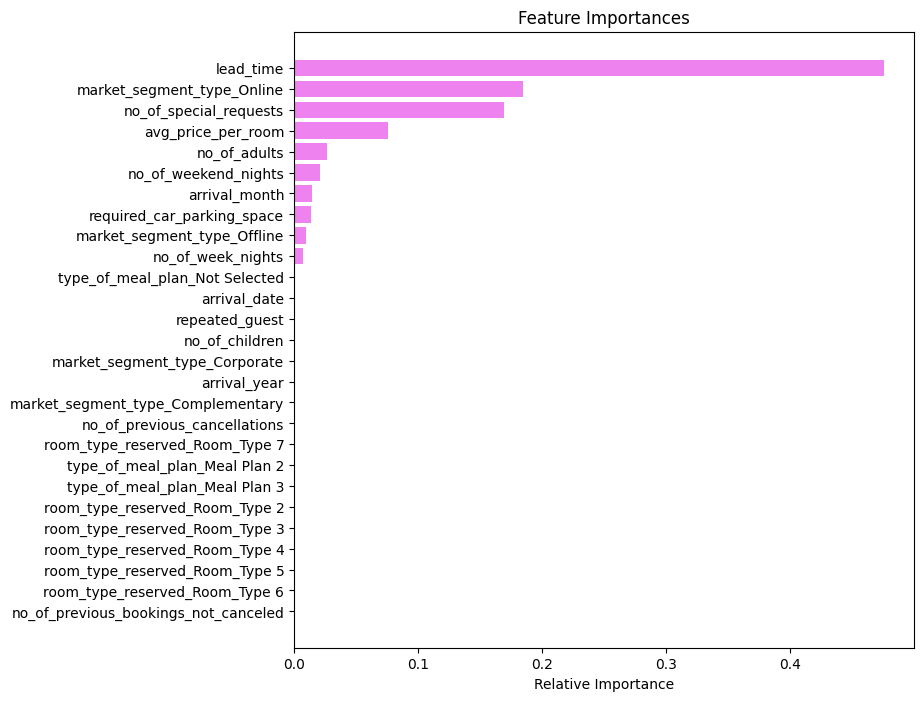

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Observations from decision tree

* We can see that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalized.


* We observe that the most important features are:
    * Lead Time
    * Market Segment - Online
    * Number of special requests
    * Average price per room

**The rules obtained from the decision tree can be interpreted as:**

* The rules show that lead time plays a key role in identifying if a booking will be cancelled or not. 151 days has been considered as a threshold value by the model to make the first split.

**Bookings made more than 151 days before the date of arrival:**

* If the average price per room is greater than 100 euros and the arrival month is December, then the the booking is less likely to be cancelled.
* If the average price per room is less than or equal to 100 euros and the number of special request is 0, then the booking is likely to get canceled.

**Bookings made under 151 days before the date of arrival:**

* If a customer has at least 1 special request the booking is less likely to be cancelled.
* If the customer didn't make any special requests and the booking was done Online it is more likely to get canceled, if the booking was not done online, it is less likely to be canceled.

`If we want more complex then we can go in more depth of the tree`

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

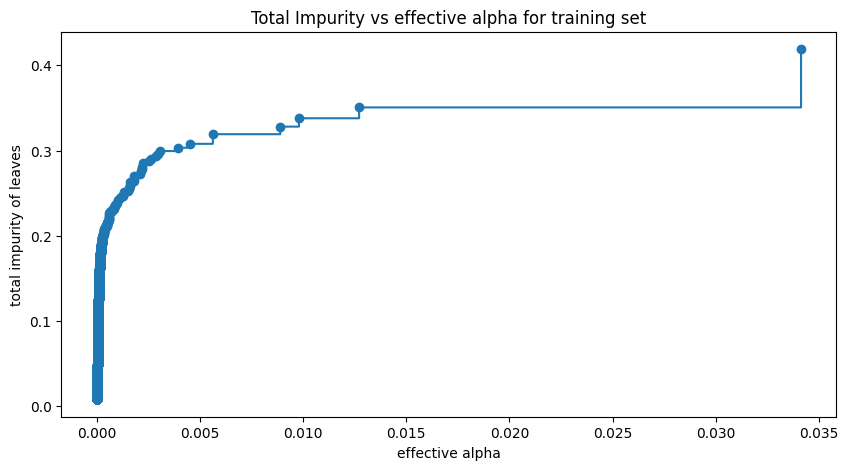

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


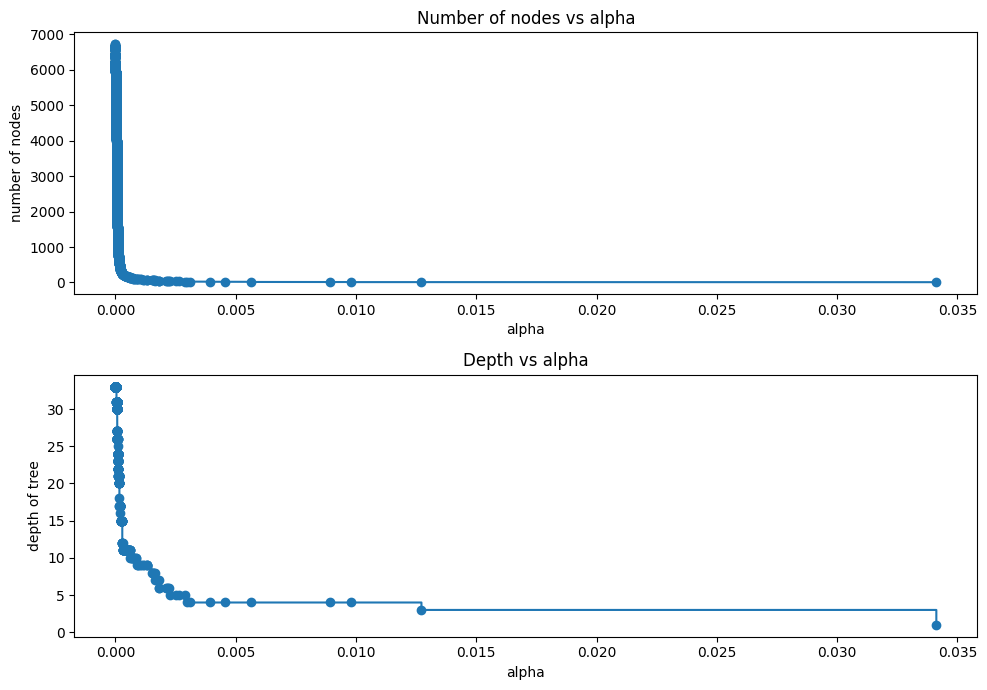

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

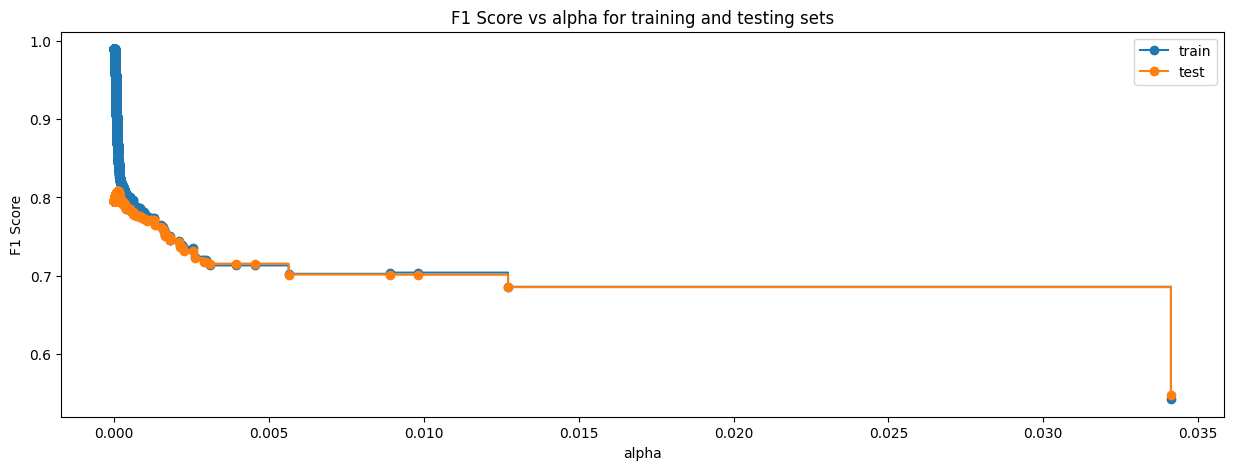

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

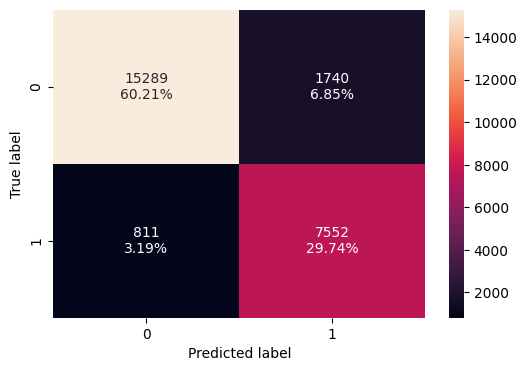

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89954 0.90303    0.81274 0.85551

#### Checking performance on test set

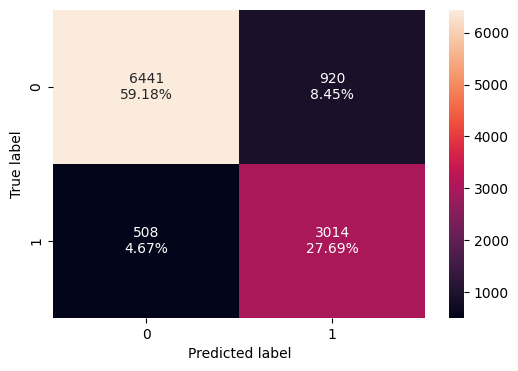

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86879 0.85576    0.76614 0.80848

**Observations**
* After post pruning the decision tree the performance has generalized on training and test set.
* We are getting high recall with this model but difference between recall and precision has increased.

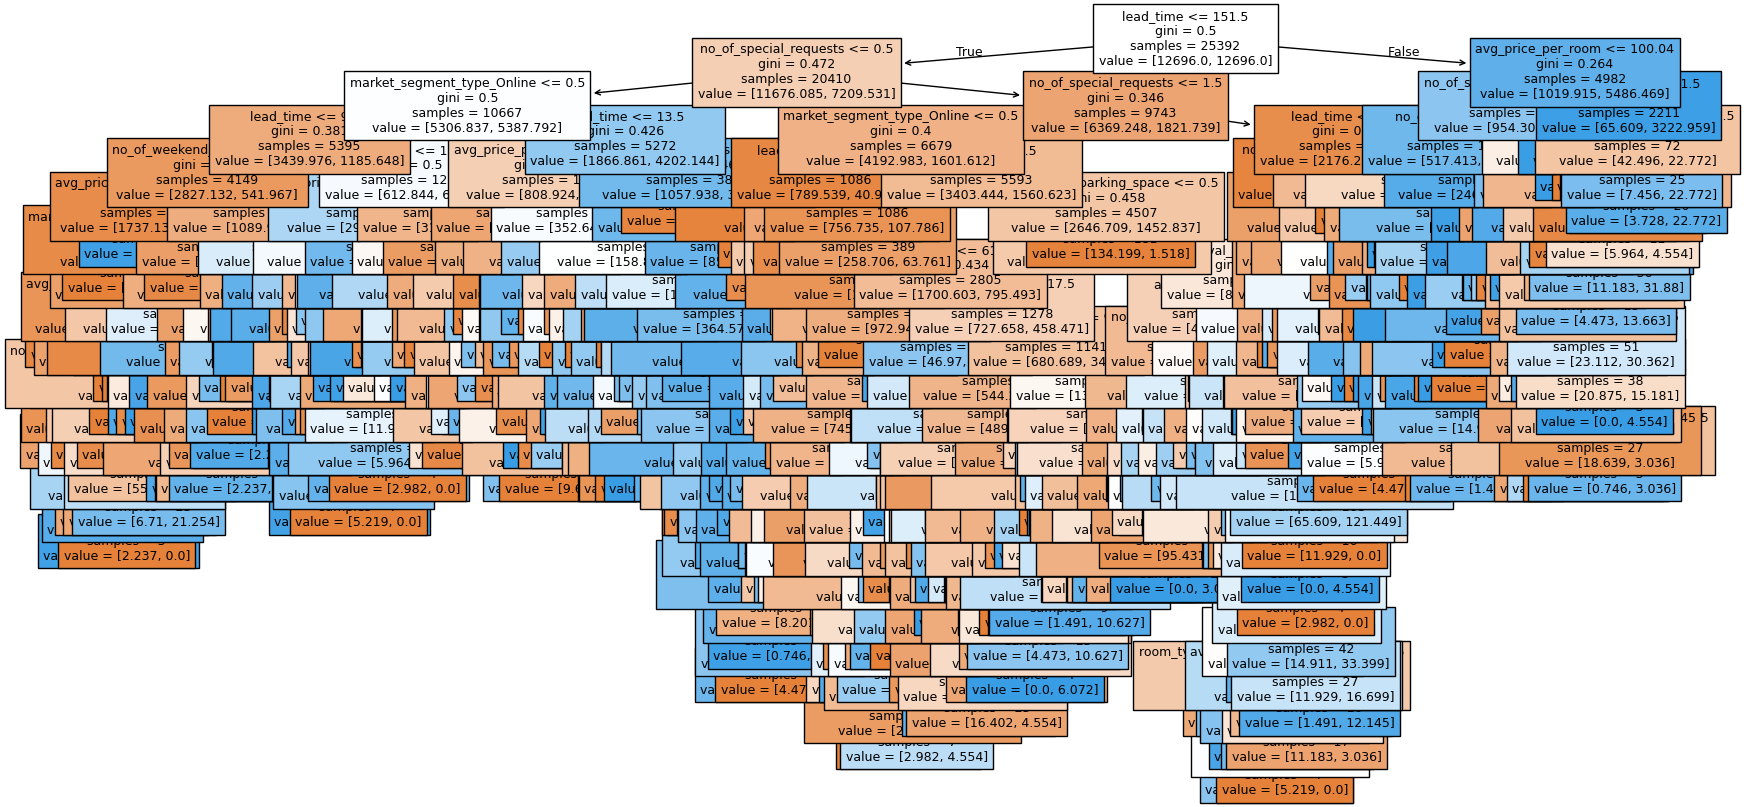

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

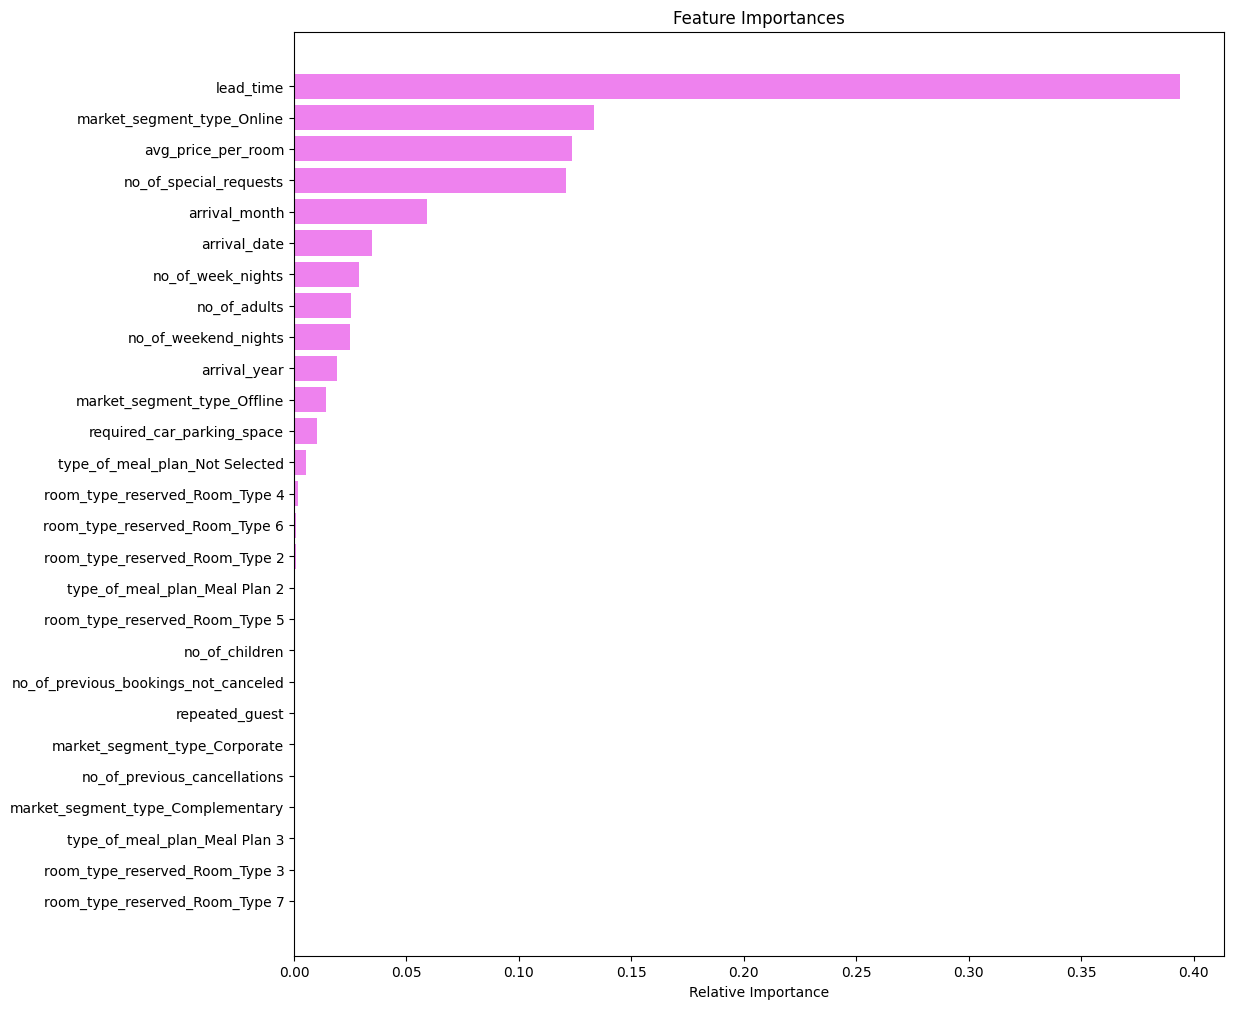

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations from tree**
* The tree is quite complex as complex as compared to the pre-pruned tree.
* The feature importance is same as we got in pre-pruned tree.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83097   
Recall                   0.98661                      0.78608   
Precision                0.99578                      0.72425   
F1                       0.99117                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89954  
Recall                          0.90303  
Precision                       0.81274  
F1                              0.85551

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87118                      0.83497   
Recall                   0.81175                      0.78336   
Precision                0.79461                      0.72758   
F1                       0.80309                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86879  
Recall                          0.85576  
Precision                       0.76614  
F1                              0.80848

**Observations**

* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Pre-pruned tree has given a generalized performance with balanced values of precision and recall.
* Post-pruned tree is giving a high F1 score as compared to other models but the difference between precision and recall is high.
* The hotel will be able to maintain a balance between resources and brand equity using the pre-pruned decision tree model.

## Actionable Insights and Recommendations

## Business Recommendations

  * **Booking policies for adults and families indicate that bookings with larger groups are more likely to be canceled.**

  The hotel can develop flexible family or group booking policies that include
  incentives such as family packages or discounts for early commitment. Clear cancellation policies with penalties can discourage cancellations without deterring bookings.

  * **Weekend and weeknight stays suggest that booking more nights, whether on weekends or weekdays, increases the likelihood of cancellations.**

      The hotel can offer promotions that encourage customers to stick to their bookings, such as non-refundable rates with added value (e.g., complimentary breakfast or discounts on additional services). This can increase customer commitment for longer stays.

* **Lead time management, which implies that the longer lead time correlates with cancellation rates**

   The hotel can implement strategies like tiered cancellation fees that increase as the booking date nears. Additionally, maintain engagement through reminders, exclusive offers, or activities during the waiting period to retain customer interest and commitment.


 * **Average room price management, which shows that higher room prices are associated with more cancellations.**

  The hotel can maintain competitive and transparent pricing. Offer price-lock guarantees or promotions for bookings made at peak rates. Providing loyalty program benefits that offset higher prices can also help retain customers.


 * **Meal Plan selection, which shows a strong relationship with increased cancellations, possibly due to lack of value or suitability.**

  The hotel can review the structure and pricing of meal plans to ensure they offer clear value. Promote meal plans as part of packages that provide better deals than a la carte dining.

 * **Car parking availability shows that bookings requiring parking are less likely to be canceled.**

  The hotel can highlight the availability and benefits of car parking spaces in marketing and booking options. Ensure that customers are aware that parking is available to improve booking retention.


* **Seasonal Trends, which show fever cancellation later in the year.**

  The hotel can promote during later months or provide seasonal offers that align with high retention periods. Capitalize on known periods of lower cancellation rates to maximize occupancy and revenue.


* **A special request shows that customers are less likely to cancel.**

  The hotel can foster an environment where guests feel encouraged to customize their stay. Highlight special request options during the booking process to increase engagement and commitment.


* **Corporate and offline market segments indicate these markets are associated with lower cancellation rates.**

  The hotel can strengthen relationships with corporate clients by offering tailored services, loyalty programs, or special corporate rates. Enhance offline booking experiences through partnerships with travel agencies and promotions.


* **Complimentary Segment this shows the lowest segment of cancellation rate likelyhood.**

  The hotel can develop strategic partnerships and programs that increase the number of complimentary or subsidized bookings. Offer these options to organizations that regularly book in bulk, such as tour operators or event organizers.





- ## *What profitable policies for cancellations and refunds can the hotel adopt?*

Policies should be clear, well-communicated during the booking process, and adaptable to market trends to stay competitive.

Policies for cancellations and refunds that balance customer satisfaction and revenue protection, hotels should consider the following strategies:

*  **A tiered cancellation policy**

1. Provides varying refund levels based on the time remaining before arrival. Guests receive a full refund if they cancel more than 30 days in advance, partial refunds for cancellations 7-30 days prior, and no refund within 7 days of arrival.
2.  This policy promotes early decision-making and reduces last-minute cancellations, aiding better occupancy management.

*   **Non-refundable rate options**

1.  Offer discounted prices compared to standard flexible rates. This approach
2.   This approach secures immediate revenue for the hotel and encourages guests to commit early. It also helps reduce the likelihood of cancellations.

*  **Flexible rebooking policies**

1.   Let guests rebook within a set period (e.g., 3-6 months) at no extra cost if they cancel, with an optional nominal rebooking fee.
2.   This approach helps maintain cash flow and encourages guests to return in the future. It also strengthens customer loyalty by offering greater flexibility.


* **Deposit requirements**

1.   Collecting a non-refundable deposit at booking, which becomes non-refundable after a specified period (e.g., 14 days before check-in). Typically set at 20-30% of the total cost, this ensures partial revenue retention.
2.   This policy helps safeguard against last-minute cancellations and minimizes potential revenue loss.


*  **A cancellation insurance option**

1.  Partnering with a third-party provider to offer guests an add-on during booking. This allows guests to receive a full refund from the insurer under specific conditions, ensuring the hotel maintains its revenue.
2.   It adds assurance for guests while protecting the hotel’s financial stability.

*   **A cancellation fee policy**

1. Flat charge for cancellations made after a certain period, such as a $50 fee for cancellations within 14-30 days of arrival. This approach ensures the hotel earns some revenue even when bookings are canceled.
2.   It also encourages guests to think carefully before canceling their reservations.


*   **Membership and loyalty programs**

1.   Provide members with more flexible cancellation and refund terms, including waived cancellation fees or longer refund windows.
2.   This incentive encourages guests to join the loyalty program, fostering stronger customer retention. Additionally, it promotes repeat bookings by rewarding loyal customers with greater flexibility.


*  **Early booking commitment discounts**

1.   Offer reduced rates for guests who book in advance, accompanied by stricter cancellation policies such as only partial refunds or no refunds within 14 days of check-in.
2.   This strategy appeals to price-sensitive customers who are ready to commit early. It also ensures that the hotel retains revenue even if these discounted bookings are later canceled.


*   **The refund credits for future stays policy**

1.  Offer guests credits equal to the amount paid for canceled bookings instead of cash refunds, with these credits valid for up to one year. This approach helps retain revenue within the business while still providing some benefit to the guest.
2.   It also encourages repeat visits by incentivizing customers to return and utilize their credits.


- ## *What other recommedations would you suggest to the hotel?*

Strategies that hotels can adopt to boost profitability, enhance customer satisfaction, and streamline overall operations include:


*   **Enhancing guest experience through personalization**

1.   Utilizing customer data to provide tailored experiences, such as customized room preferences, meal choices, and activity suggestions. This information can be gathered through pre-stay surveys or loyalty programs.
2.  By personalizing the guest experience, hotels can increase customer loyalty, generate positive reviews, and encourage higher rates of repeat bookings.


*   **Implementing dynamic pricing strategies**

1.   Adjust room rates based on factors like demand, seasonality, and local events. This approach maximizes revenue during high-demand periods while attracting budget-conscious travelers during off-peak times.
2.  It optimizes both revenue and occupancy rates throughout the year.

*  **Upselling and cross-selling services**

1.   Presenting guests with options to upgrade their bookings or add services like room enhancements, spa treatments, or dining experiences. Automated systems can suggest these options during the booking process or at check-in to streamline the experience.
2.   This strategy not only boosts the average revenue per booking but also enhances guest satisfaction by delivering added value.



*   **Developing partnerships with local attractions**

1.   Collaborating with nearby restaurants, tour operators, and entertainment venues to create bundled experiences at discounted rates for guests. This strategy adds value to the guest experience while also supporting local businesses
2.   It increases the likelihood that guests will choose the hotel for its comprehensive offerings.


*   **Offering flexible check-in and check-out times**

1.   Allows guests to select their preferred times for an additional fee, enhancing their convenience. This can be efficiently managed through technology to ensure seamless room availability.
2.   It not only improves the guest experience but also creates an additional revenue stream for the hotel.


*  **Improving marketing efforts**

1.   Implementing targeted digital campaigns aimed at specific segments, such as business travelers, families, or couples. By leveraging social media, search engine optimization (SEO), and email marketing, the hotel can enhance its visibility and engagement.
2.   his strategy increases direct bookings, reducing reliance on third-party booking sites and their associated fees.


*   **Strengthening staff training programs**

1.  regularly educating employees on customer service best practices, upselling techniques, and crisis management to ensure they deliver consistent, high-quality service.
2.   t fosters a positive work culture, contributing to overall employee morale and performance.



*  **Monitoring competitor strategies**

1.   Regularly analyzing their pricing, promotions, and customer reviews to maintain a competitive edge.
2.  This proactive approach enables the hotel to adapt quickly to market trends and remain appealing to potential customers.







In [ ]:
!jupyter nbconvert --to html /content/sample_data/Project_SLC_DSBA_INNHotels_FullCode.ipynb

[NbConvertApp] Converting notebook /content/sample_data/Project_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 56 image(s).
[NbConvertApp] Writing 4778666 bytes to /content/sample_data/Project_SLC_DSBA_INNHotels_FullCode.html
